# TASK 2 CREDIT CARD FRAUD DETECTION

Build a model to detect fraudulent credit card transactions. Use a
dataset containing information about credit card transactions, and
experiment with algorithms like Logistic Regression, Decision Trees,
or Random Forests to classify transactions as fraudulent or
legitimate.

#About the Dataset

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_test=pd.read_csv('E:/CodSoft/archive (1)/fraudTest.csv')
df_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [ ]:
df_train=pd.read_csv('E:/CodSoft/archive (1)/fraudTrain.csv')
df_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [ ]:
# Merge the DataFrames
df = pd.concat([df_train, df_test], ignore_index=True)
df


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# The dataset represents transactions possibly related to fraud detection:

1. **Unnamed: 0 (int64)**: This column likely contains the default index generated by pandas when loading the data from a CSV file.

2. **trans_date_trans_time (object)**: The timestamp of the transaction. This field indicates the exact date and time when the transaction occurred.
3. **cc_num (int64)**: The credit card number used in the transaction. This is a unique identifier for the credit card.
4. **merchant (object)**: The name or identifier of the merchant where the transaction took place. This helps identify the business involved in the transaction.
5. **category (object)**: The category of the merchant. This field classifies the type of merchant (e.g., groceries, electronics, clothing) to understand the nature of the transaction.
6. **amt (float64)**: The amount of the transaction. This field indicates the monetary value involved in the transaction.
7. **first (object)**: The first name of the credit card holder. This is part of the personal information of the cardholder.
8. **last (object)**: The last name of the credit card holder. This is another part of the personal information of the cardholder.
9. **gender (object)**: The gender of the credit card holder. This could be used for demographic analysis or fraud detection patterns.
10. **street (object)**: The street address of the credit card holder. This is part of the cardholder's address information.
11. **city (object)**: The city where the credit card holder resides. This is part of the cardholder's address information.
12. **state (object)**: The state where the credit card holder resides. This is part of the cardholder's address information.
13. **zip (int64)**: The postal code (ZIP code) of the credit card holder's address. This helps in identifying the specific area of the cardholder.
14. **lat (float64)**: The latitude coordinate of the credit card holder's address. This is part of the geolocation information.
15. **long (float64)**: The longitude coordinate of the credit card holder's address. This is part of the geolocation information.
16. **city_pop (int64)**: The population of the city where the credit card holder resides. This provides context about the cardholder's living environment.
17. **job (object)**: The occupation of the credit card holder. This could be used for demographic analysis or identifying spending patterns related to occupations.
18. **dob (object)**: The date of birth of the credit card holder. This helps in identifying the age of the cardholder, which can be relevant in some analyses.
19. **trans_num (object)**: The transaction number or identifier. This is a unique ID for each transaction.
20. **unix_time (int64)**: The timestamp of the transaction in Unix time format. This is an alternative way of representing the transaction time, useful for certain time-based calculations.
21. **merch_lat (float64)**: The latitude coordinate of the merchant's location. This is part of the geolocation information for where the transaction took place.
22. **merch_long (float64)**: The longitude coordinate of the merchant's location. This is part of the geolocation information for where the transaction took place.
23. **is_fraud (int64)**: A binary indicator (usually 0 or 1) denoting whether the transaction is fraudulent (1) or not (0). This is the target variable in a fraud detection model.


In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

#The summary of the dataset statistics:

- **Row Count**: 1,852,394 transactions.
- **Fraud Rate**: 0.52% of transactions are fraudulent.
- **Average Transaction Amount**: $70.06.

- **Transaction Amount Range**: $1.00 to $28,948.90.
- **Credit Card Numbers**: Range from (6.04e+10) to (4.99e+18).
- **Zip Codes**: Range from 1,257 to 99,921.
- **Geolocation**:
  - Latitude (Customer): 20.03 to 66.69.
  - Longitude (Customer): -165.67 to -67.95.
  - Latitude (Merchant): 19.03 to 67.51.
  - Longitude (Merchant): -166.67 to -66.95.
- **City Population**: 23 to 2,906,700.
- **Timestamps**: Unix time from (1.33e+9) to (1.39e+9).

In [ ]:
# Display summary statistics
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


### Null Values
- **All columns**: No null values present in any column.

### Duplicated Values
- **Row Duplicates**: 0 rows are duplicated.
### Column Duplicates:
  - **Unnamed: 0**: 555,719 duplicate values.
  - **trans_date_trans_time**: 32,843 duplicate values.
  - **cc_num**: 1,851,395 duplicate values.
  - **merchant**: 1,851,701 duplicate values.
  - **category**: 1,852,380 duplicate values.
  - **amt**: 1,791,778 duplicate values.
  - **first**: 1,852,039 duplicate values.
  - **last**: 1,851,908 duplicate values.
  - **gender**: 1,852,392 duplicate values.
  - **street**: 1,851,395 duplicate values.
  - **city**: 1,851,488 duplicate values.
  - **state**: 1,852,343 duplicate values.
  - **zip**: 1,851,409 duplicate values.
  - **lat**: 1,851,411 duplicate values.
  - **long**: 1,851,411 duplicate values.
  - **city_pop**: 1,851,503 duplicate values.
  - **job**: 1,851,897 duplicate values.
  - **dob**: 1,851,410 duplicate values.
  - **trans_num**: 0 duplicate values (all unique).
  - **unix_time**: 32,811 duplicate values.
  - **merch_lat**: 98,237 duplicate values.
  - **merch_long**: 42,641 duplicate values.
  - **is_fraud**: 1,852,392 duplicate values.

### Observations
- **Unique Identifiers**: `trans_num` is unique for each transaction, which is expected.
- **High Duplicates in Certain Columns**: Columns like `cc_num`, `merchant`, and `category` have a significant number of duplicates. This might indicate that the dataset includes multiple transactions from the same credit card or merchant, which is common in transaction datasets.

In [ ]:
# Check for null values
df.isnull().sum()


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
# Check for duplicated rows
df.duplicated().sum()

0

In [ ]:
# Check for duplicated values within each column
df.apply(lambda x: x.duplicated().sum())

Unnamed: 0                555719
trans_date_trans_time      32843
cc_num                   1851395
merchant                 1851701
category                 1852380
amt                      1791778
first                    1852039
last                     1851908
gender                   1852392
street                   1851395
city                     1851488
state                    1852343
zip                      1851409
lat                      1851411
long                     1851411
city_pop                 1851503
job                      1851897
dob                      1851410
trans_num                      0
unix_time                  32811
merch_lat                  98237
merch_long                 42641
is_fraud                 1852392
dtype: int64

1. Unnamed: 0

Removed 'Unnamed: 0' because it is unnecessary.

In [ ]:
# Drop 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

2. trans_date_trans_time

Converting trans_date_trans_time into datetime and extracting relevant features is crucial for leveraging temporal information in the data, improving the predictive power of using models, and enabling more effective analysis and visualization.

In [ ]:
df['trans_date_trans_time']

0          2019-01-01 00:00:18
1          2019-01-01 00:00:44
2          2019-01-01 00:00:51
3          2019-01-01 00:01:16
4          2019-01-01 00:03:06
                  ...         
1852389    2020-12-31 23:59:07
1852390    2020-12-31 23:59:09
1852391    2020-12-31 23:59:15
1852392    2020-12-31 23:59:24
1852393    2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 1852394, dtype: object

In [ ]:
# Convert the 'trans_date_trans_time' column to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Verify the conversion
df['trans_date_trans_time'].head()

0   2019-01-01 00:00:18
1   2019-01-01 00:00:44
2   2019-01-01 00:00:51
3   2019-01-01 00:01:16
4   2019-01-01 00:03:06
Name: trans_date_trans_time, dtype: datetime64[ns]

In [ ]:
df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

3. cc_num

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['cc_num']

0          2703186189652095
1              630423337322
2            38859492057661
3          3534093764340240
4           375534208663984
                 ...       
1852389      30560609640617
1852390    3556613125071656
1852391    6011724471098086
1852392       4079773899158
1852393    4170689372027579
Name: cc_num, Length: 1852394, dtype: int64

### cc_num Histogram Analysis

- **Mean:** 417,386,038,393,710,400.00
  - The average value of the credit card numbers is extremely high, indicating very large numbers in the dataset.

- **Median:** 3,521,417,320,836,166.00
  - The middle value of the dataset, suggesting half of the credit card numbers are below this value and half are above.

- **Mode:** 30,270,432,095,985.00
  - The most frequently occurring value, indicating one credit card number appears more often than others.

- **Skewness:** 2.85 (Right-skewed)
  - The distribution is right-skewed, with a long tail on the right side due to a few extremely large values.

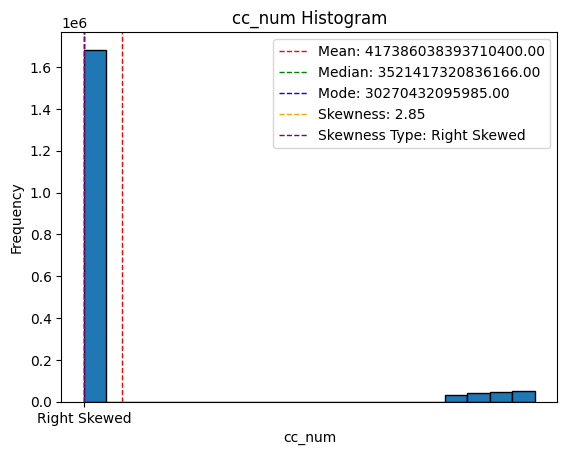

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Calculate statistics
credit_scores = df['cc_num']
mean = credit_scores.mean()
median = credit_scores.median()
mode = credit_scores.mode()[0]  # mode can be multiple values, take the first one
skewness = credit_scores.skew()

# Determine skewness type
if skewness < -0.5:
    skewness_type = 'Left Skewed'
elif skewness > 0.5:
    skewness_type = 'Right Skewed'
else:
    skewness_type = 'Approximately Symmetric'

# Create a matplotlib histogram
plt.hist(credit_scores, bins=20, edgecolor='black')  # Adjust bins as needed
plt.title('cc_num Histogram')
plt.xlabel('cc_num')
plt.ylabel('Frequency')

# Add annotations for mean, median, mode, skewness, and skewness type
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')
plt.axvline(mode, color='b', linestyle='dashed', linewidth=1, label=f'Mode: {mode:.2f}')
plt.axvline(skewness, color='orange', linestyle='dashed', linewidth=1, label=f'Skewness: {skewness:.2f}')
plt.axvline(skewness_type, color='purple', linestyle='dashed', linewidth=1, label=f'Skewness Type: {skewness_type}')

# Add legend
plt.legend()

# Display legend
plt.legend()

# Show the plot
plt.show()


### cc_num Box Plot

- **Q1:** 180,042,946,491,150.00
- **Median (Q2):** 2,521,417,320,836,166.00
- **Q3:** 4,642,255,475,285,942.00
- **Min:** 60,416,207,185.00
- **Max:** 4,992,346,398,065,154,048.00
- **Outliers:** 169,771

The box plot of `cc_num` shows a wide range with significant outliers, indicating a highly variable dataset.

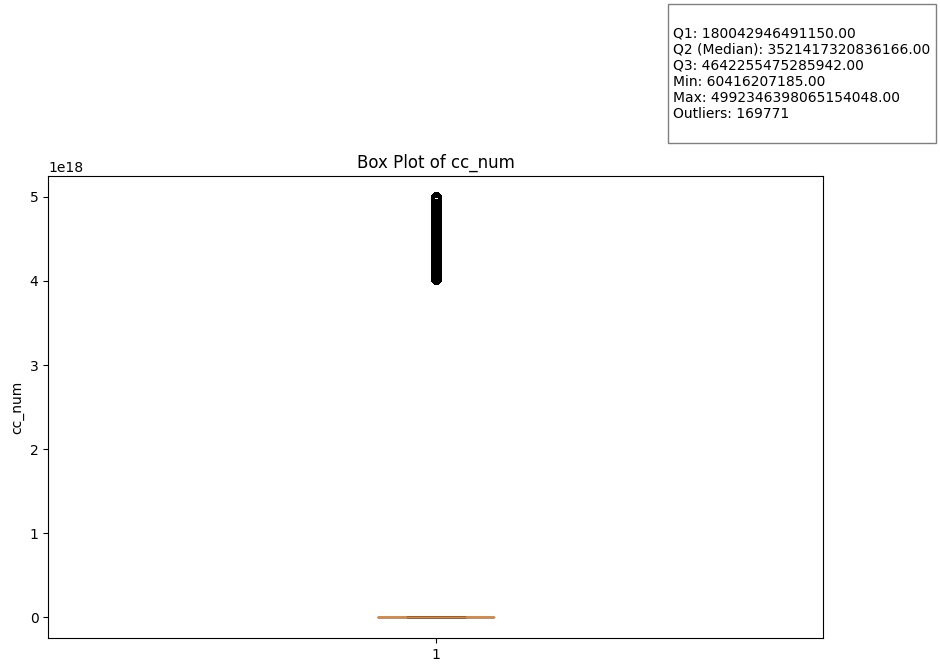

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate statistics
q1 = df['cc_num'].quantile(0.25)
q2 = df['cc_num'].median()
q3 = df['cc_num'].quantile(0.75)
iqr = q3 - q1
min_val = df['cc_num'].min()
max_val = df['cc_num'].max()
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['cc_num'] < lower_bound) | (df['cc_num'] > upper_bound)]

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['cc_num'])
plt.ylabel('cc_num')
plt.title('Box Plot of cc_num')

# Create a text box with summary statistics
stats_text = f"""
Q1: {q1:.2f}
Q2 (Median): {q2:.2f}
Q3: {q3:.2f}
Min: {min_val:.2f}
Max: {max_val:.2f}
Outliers: {outliers.shape[0]}
"""

# Add text box to the plot
plt.gcf().text(0.75, 0.95, stats_text, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


The `cc_num` column, with its wide range and numerous outliers, does not significantly impact the overall dataset. Therefore, it is advisable to exclude or ignore this column in further analysis or modeling. This decision simplifies data handling and ensures that the peculiarities of the `cc_num` values do not skew the results.

4. merchant

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['merchant']

0                  fraud_Rippin, Kub and Mann
1             fraud_Heller, Gutmann and Zieme
2                        fraud_Lind-Buckridge
3          fraud_Kutch, Hermiston and Farrell
4                         fraud_Keeling-Crist
                          ...                
1852389                 fraud_Reilly and Sons
1852390                  fraud_Hoppe-Parisian
1852391                       fraud_Rau-Robel
1852392                 fraud_Breitenberg LLC
1852393                     fraud_Dare-Marvin
Name: merchant, Length: 1852394, dtype: object

The bar chart shows the top 30 merchants by transaction count. The highest number of transactions (6262) is with "fraud_Kilback LLC," followed by several others with counts ranging from 5246 to 3774. The distribution shows a significant drop after the top six merchants.

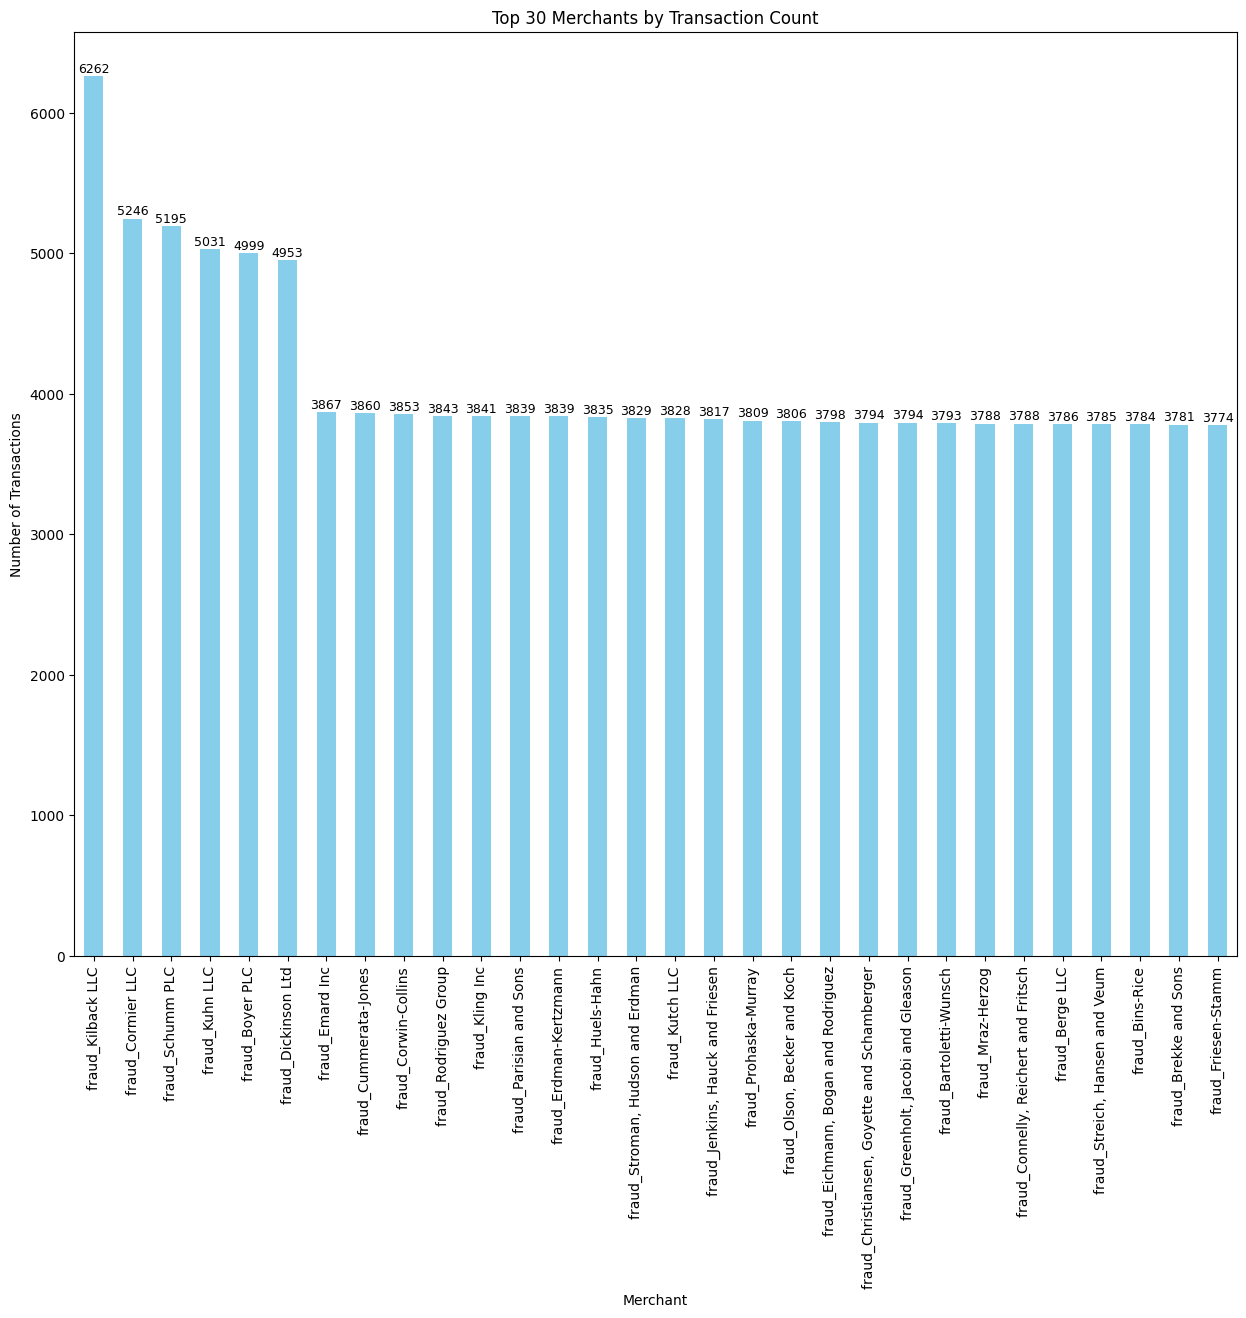

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Get the top 30 merchants
top_30_merchants = df['merchant'].value_counts().head(30)

# Plot the histogram
plt.figure(figsize=(15, 12))
bars = top_30_merchants.plot(kind='bar', color='skyblue')
plt.title('Top 30 Merchants by Transaction Count')
plt.xlabel('Merchant')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate the top of each bar with the count
for i, count in enumerate(top_30_merchants):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=9)

plt.show()


5. category

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['category']

0                misc_net
1             grocery_pos
2           entertainment
3           gas_transport
4                misc_pos
                ...      
1852389    health_fitness
1852390         kids_pets
1852391         kids_pets
1852392            travel
1852393     entertainment
Name: category, Length: 1852394, dtype: object

**Top Category:** `gas_transport` with 188,029 transactions.
- **Next Categories:**
  - `grocery_pos`: 176,191 transactions
  - `home`: 175,460 transactions
  - `shopping_pos`: 166,463 transactions
  - `kids_pets`: 161,727 transactions
- **Remaining Categories:** Range from 139,322 to 57,956 transactions.

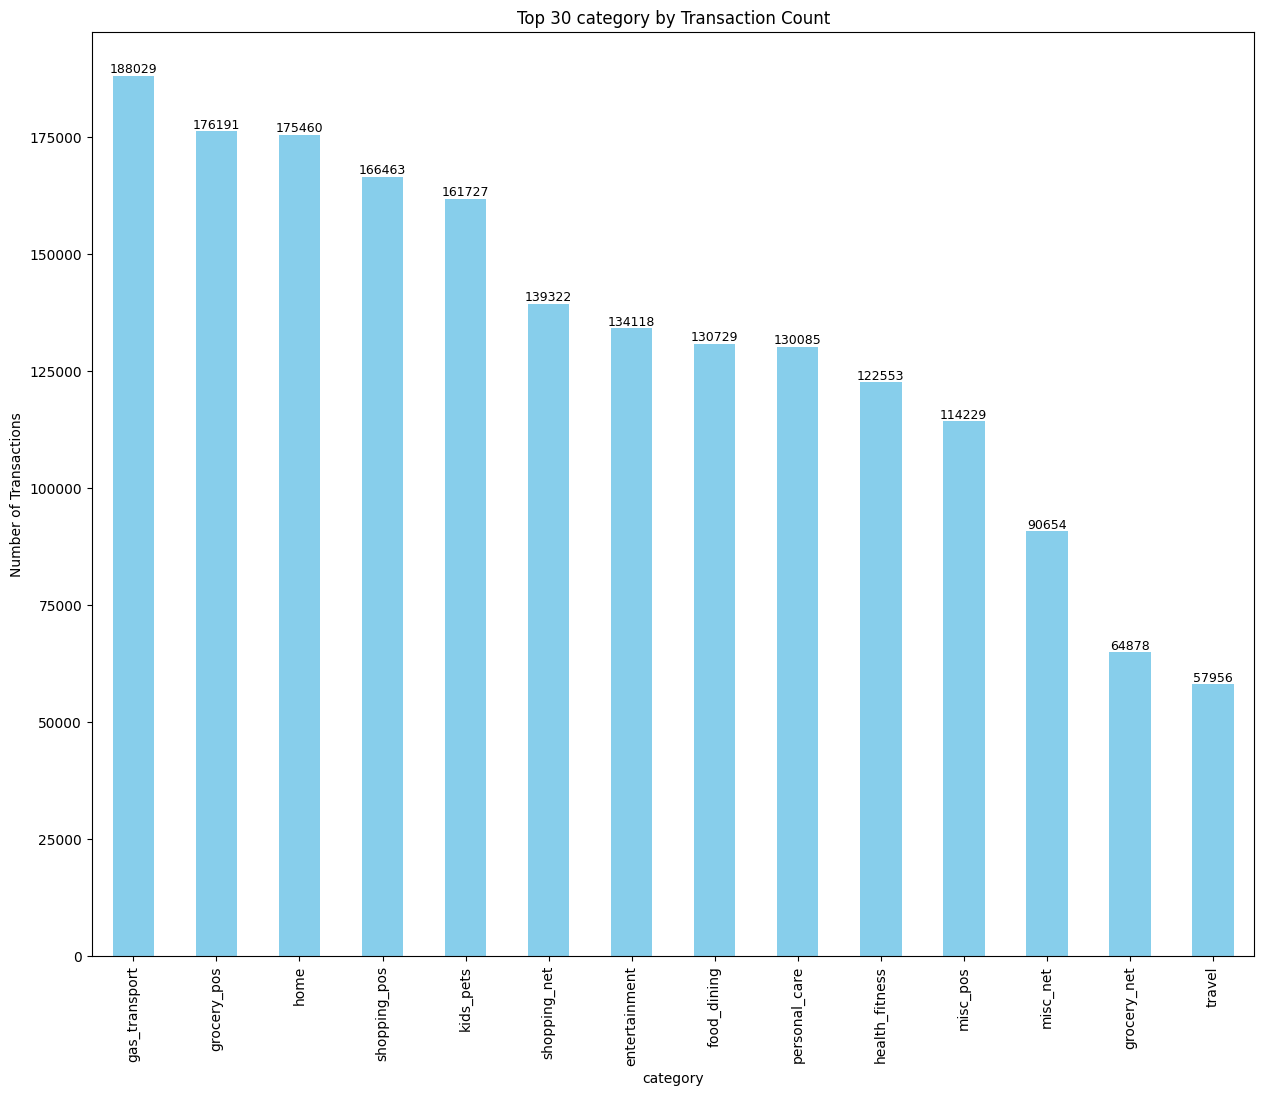

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Get the top 30 merchants
top_30_category = df['category'].value_counts().head(30)

# Plot the histogram
plt.figure(figsize=(15, 12))
bars = top_30_category.plot(kind='bar', color='skyblue')
plt.title('Top 30 category by Transaction Count')
plt.xlabel('category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate the top of each bar with the count
for i, count in enumerate(top_30_category):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=9)

plt.show()


6. amt

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['amt']

0            4.97
1          107.23
2          220.11
3           45.00
4           41.96
            ...  
1852389     43.77
1852390    111.84
1852391     86.88
1852392      7.99
1852393     38.13
Name: amt, Length: 1852394, dtype: float64

### Transaction Distribution:
 Most transactions are clustered below $5,000.

- **Outliers:** A few transactions exceed $20,000.
- **Overall Pattern:** The majority of transaction amounts are low, with sporadic high-value transactions.

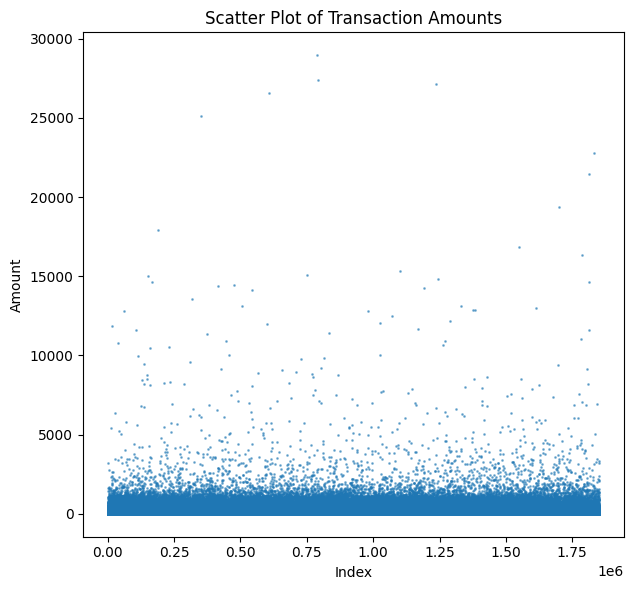

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['amt'], alpha=0.5, s=1)
plt.title('Scatter Plot of Transaction Amounts')
plt.xlabel('Index')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()


### amt Box Plot

- **Q1:** 9.64
- **Median (Q2):** 47.45
- **Q3:** 83.10
- **Min:** 1.00
- **Max:** 28,948.90
- **Outliers:** 95,054

The 'amt' column has a wide range with significant outliers, indicating high variability in transaction amounts.

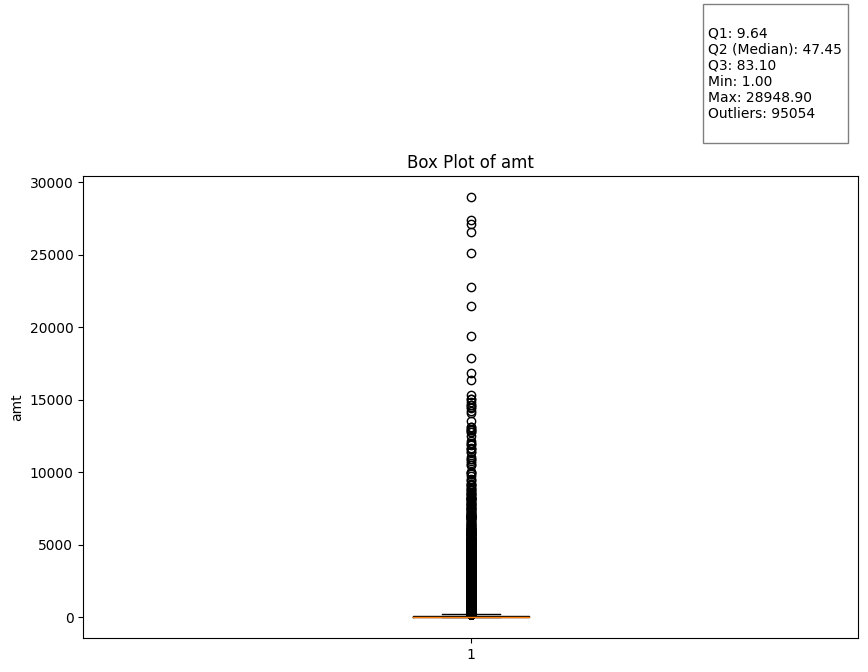

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate statistics
q1 = df['amt'].quantile(0.25)
q2 = df['amt'].median()
q3 = df['amt'].quantile(0.75)
iqr = q3 - q1
min_val = df['amt'].min()
max_val = df['amt'].max()
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['amt'] < lower_bound) | (df['amt'] > upper_bound)]

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['amt'])
plt.ylabel('amt')
plt.title('Box Plot of amt')

# Create a text box with summary statistics
stats_text = f"""
Q1: {q1:.2f}
Q2 (Median): {q2:.2f}
Q3: {q3:.2f}
Min: {min_val:.2f}
Max: {max_val:.2f}
Outliers: {outliers.shape[0]}
"""

# Add text box to the plot
plt.gcf().text(0.75, 0.95, stats_text, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


The `amt` column, with its wide range (min: 1.00, max: 28,948.90) and significant number of outliers (95,054), exhibits high variability. Despite this, it does not significantly impact the overall dataset. Therefore, it is advisable to exclude or ignore this column in further analysis or modeling. This decision simplifies data handling and ensures that the peculiarities of the `amt` values do not skew the results.

7. first

In [ ]:
df.columns


Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['first']

0           Jennifer
1          Stephanie
2             Edward
3             Jeremy
4              Tyler
             ...    
1852389      Michael
1852390         Jose
1852391          Ann
1852392         Eric
1852393       Samuel
Name: first, Length: 1852394, dtype: object

In [ ]:
len(set(df['first']))

355

### Top 20 First Names by Transaction Count

- **Top Name:** Christopher with 38,112 transactions.
- **Next Names:**
  - Robert: 30,743 transactions
  - Jessica: 29,236 transactions
  - David: 28,564 transactions
  - Michael: 28,539 transactions
- **Remaining Names:** Range from 24,181 to 16,808 transactions.

The chart shows that Christopher leads significantly in transaction counts, followed by a gradual decrease among the other top first names.

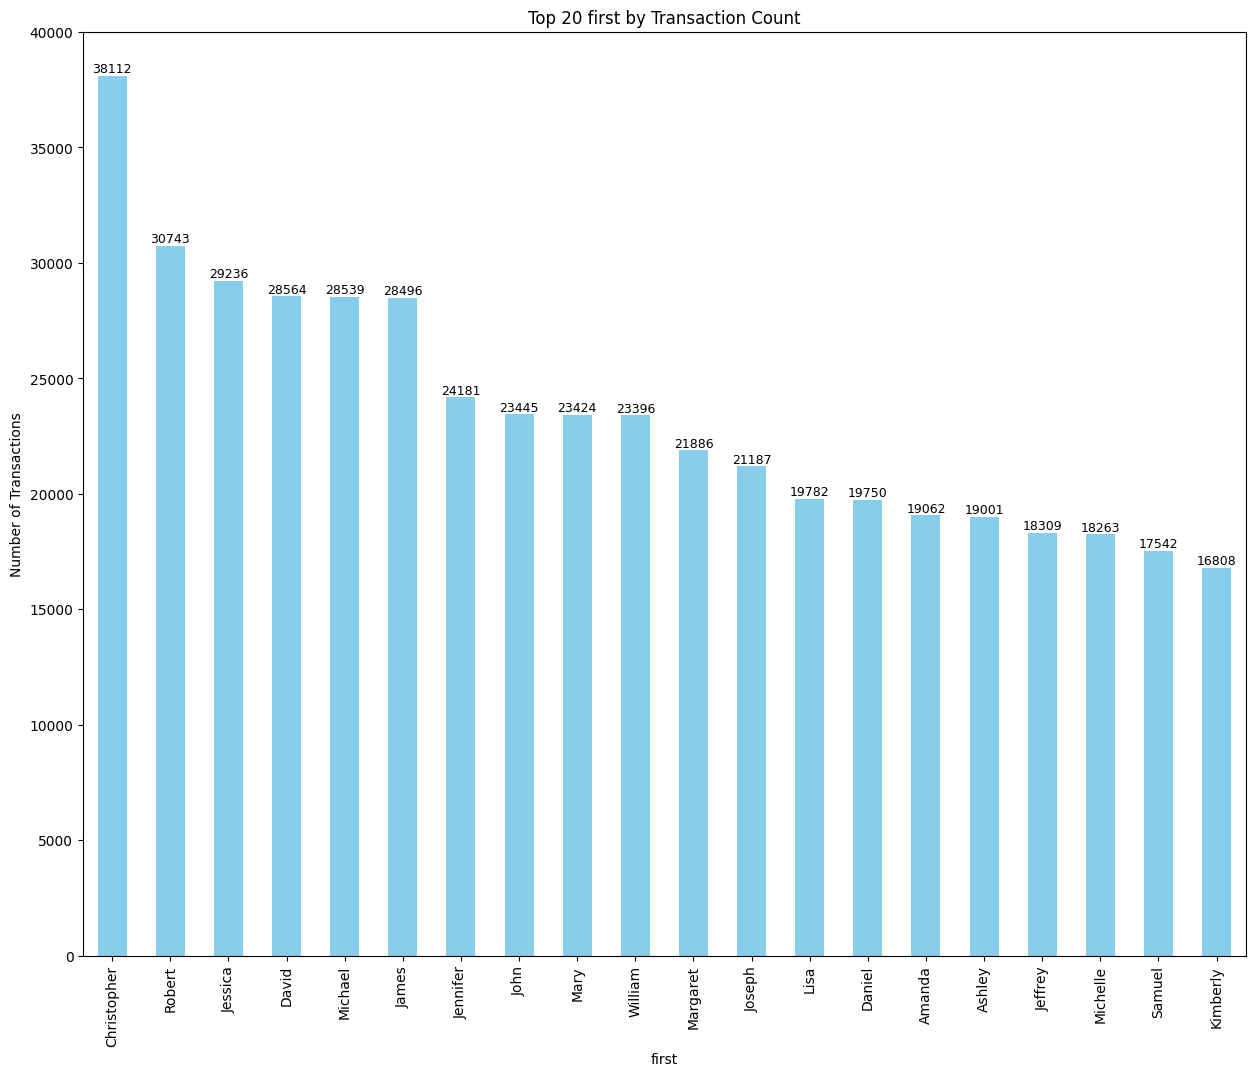

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Get the top 20 merchants
top_20_first = df['first'].value_counts().head(20)

# Plot the histogram
plt.figure(figsize=(15, 12))
bars = top_20_first.plot(kind='bar', color='skyblue')
plt.title('Top 20 first by Transaction Count')
plt.xlabel('first')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate the top of each bar with the count
for i, count in enumerate(top_20_first):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=9)

plt.show()


8. last

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['last']

0            Banks
1             Gill
2          Sanchez
3            White
4           Garcia
            ...   
1852389      Olson
1852390    Vasquez
1852391     Lawson
1852392    Preston
1852393       Frey
Name: last, Length: 1852394, dtype: object

### Top 20 Last Names by Transaction Count

- **Top Name:** Smith with 40,940 transactions.
- **Next Names:**
  - Williams: 33,661 transactions
  - Davis: 31,434 transactions
  - Johnson: 28,590 transactions
  - Rodriguez: 24,879 transactions
- **Remaining Names:** Range from 21,246 to 12,426 transactions.

The chart shows that Smith leads significantly in transaction counts, followed by a gradual decrease among the other top last names.              

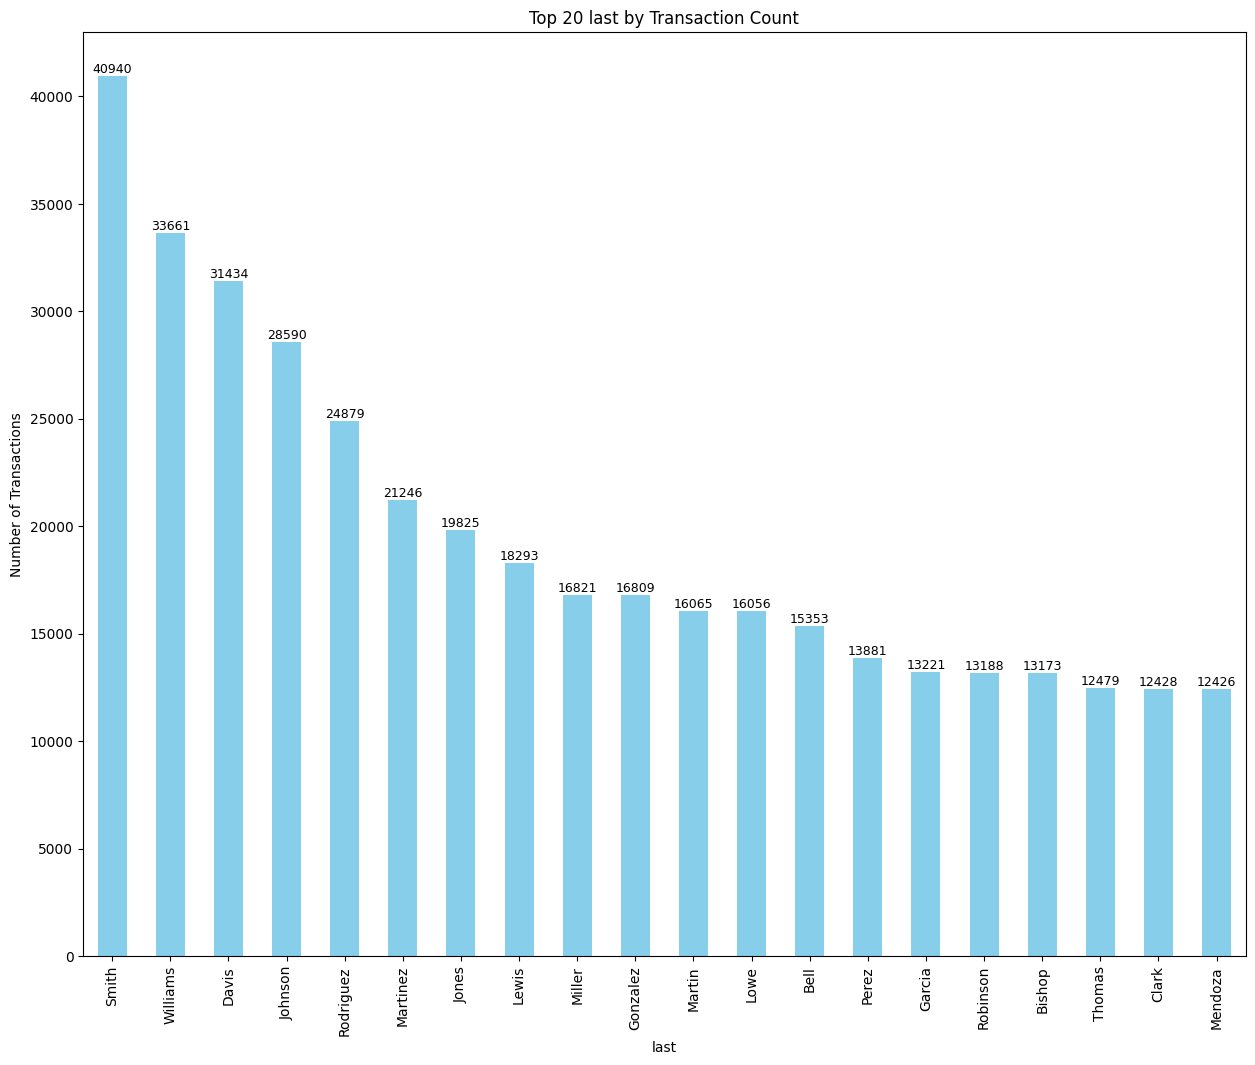

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Get the top 20 merchants
top_20_last = df['last'].value_counts().head(20)

# Plot the histogram
plt.figure(figsize=(15, 12))
bars = top_20_last.plot(kind='bar', color='skyblue')
plt.title('Top 20 last by Transaction Count')
plt.xlabel('last')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate the top of each bar with the count
for i, count in enumerate(top_20_last):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=9)

plt.show()


9. gender

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

### Gender Distribution

- **Female (F):** 1,014,749 (54.78%)
- **Male (M):** 837,645 (45.22%)

The dataset contains more females than males, with females comprising a higher proportion of the transactions.

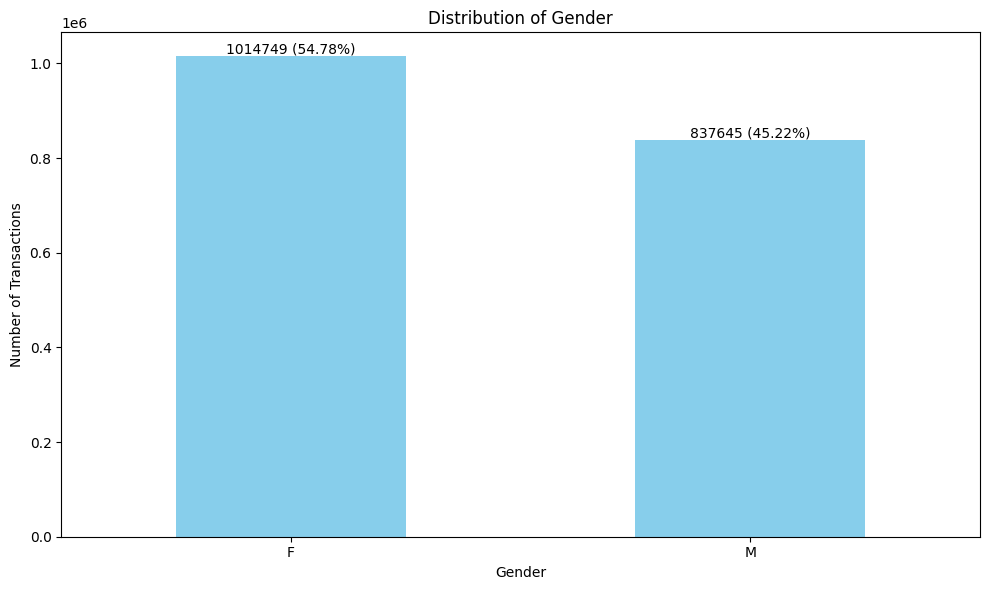

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate counts and percentages
gender_counts = df['gender'].value_counts()
gender_percentages = (gender_counts / len(df)) * 100

# Combine counts and percentages into a DataFrame for easy plotting
gender_summary = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_percentages
})

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = gender_summary['Count'].plot(kind='bar', color='skyblue')

# Add counts and percentages on the bars
for i, (count, percentage) in enumerate(zip(gender_summary['Count'], gender_summary['Percentage'])):
    plt.text(i, count + 5, f'{count} ({percentage:.2f}%)', ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal
plt.tight_layout()

plt.show()


10. street

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['street']

0                        561 Perry Cove
1          43039 Riley Greens Suite 393
2              594 White Dale Suite 530
3           9443 Cynthia Court Apt. 038
4                      408 Bradley Rest
                       ...             
1852389             558 Michael Estates
1852390             572 Davis Mountains
1852391      144 Evans Islands Apt. 683
1852392      7020 Doyle Stream Apt. 951
1852393        830 Myers Plaza Apt. 384
Name: street, Length: 1852394, dtype: object

In [ ]:
len(set(df['street']))

999

### Top 30 Streets by Transaction Count

Each of the top 30 streets has a transaction count ranging from 4,376 to 4,392, indicating a very consistent and evenly distributed transaction volume across these locations.

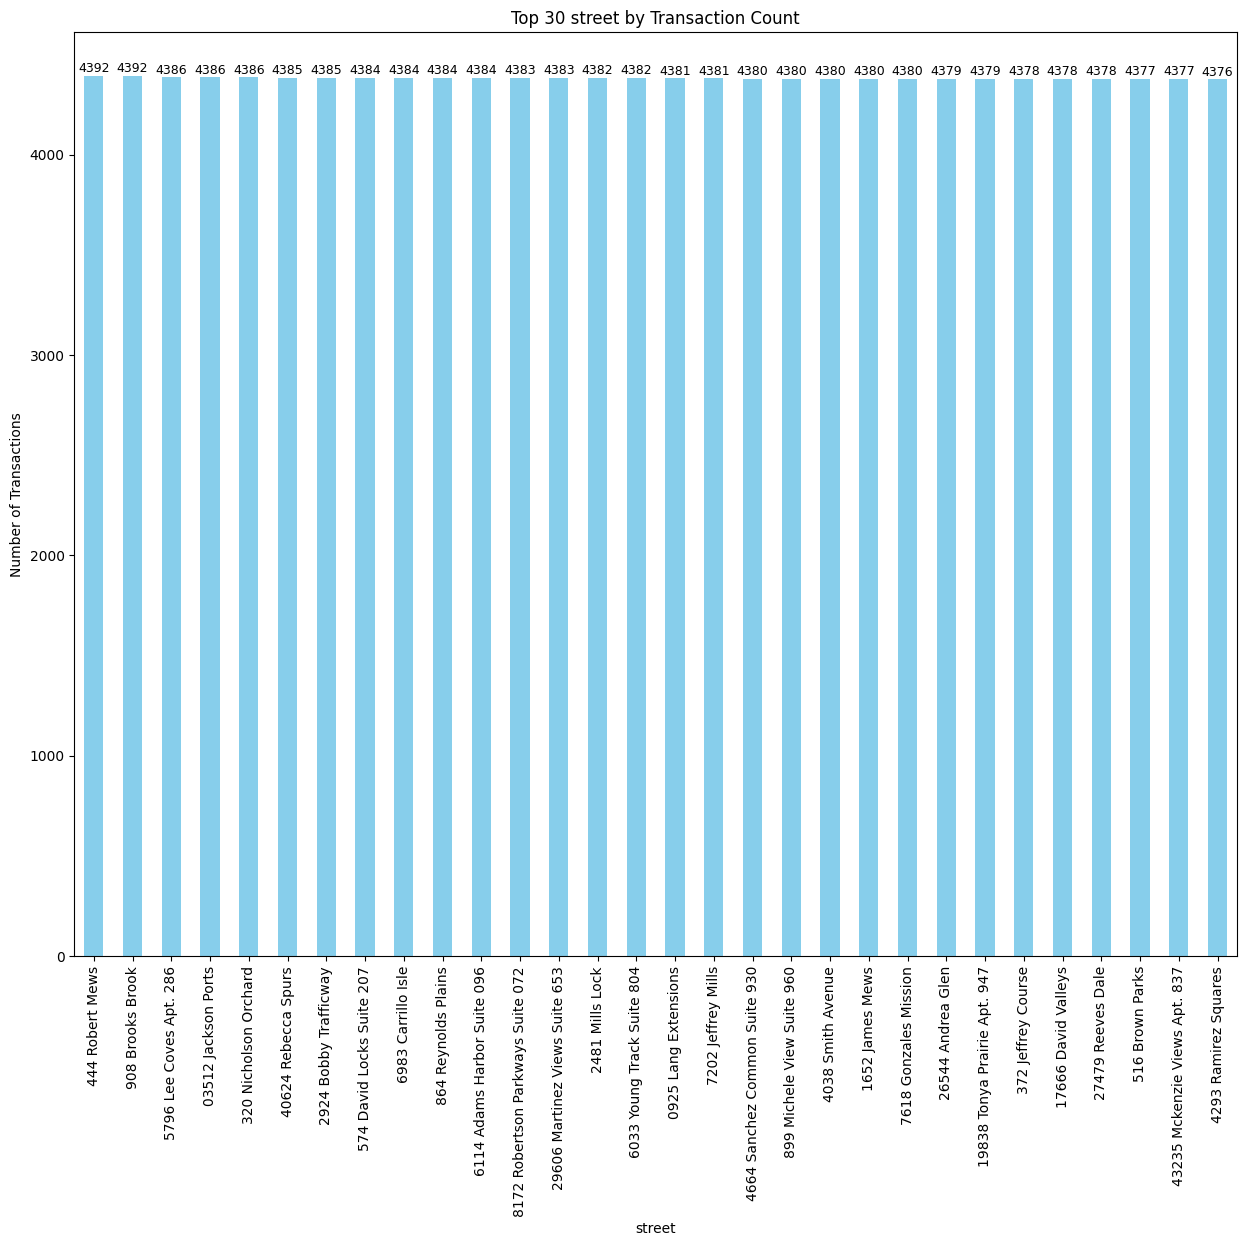

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Get the top 30 merchants
top_30_street = df['street'].value_counts().head(30)

# Plot the histogram
plt.figure(figsize=(15, 12))
bars = top_30_street.plot(kind='bar', color='skyblue')
plt.title('Top 30 street by Transaction Count')
plt.xlabel('street')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate the top of each bar with the count
for i, count in enumerate(top_30_street):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=9)

plt.show()


11. city

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
len(set(df['city']))

906

### Top 30 Cities by Transaction Count

The transaction counts for the top 30 cities range from 8040 to 4400, reflecting a consistent and evenly distributed transaction volume across these locations.

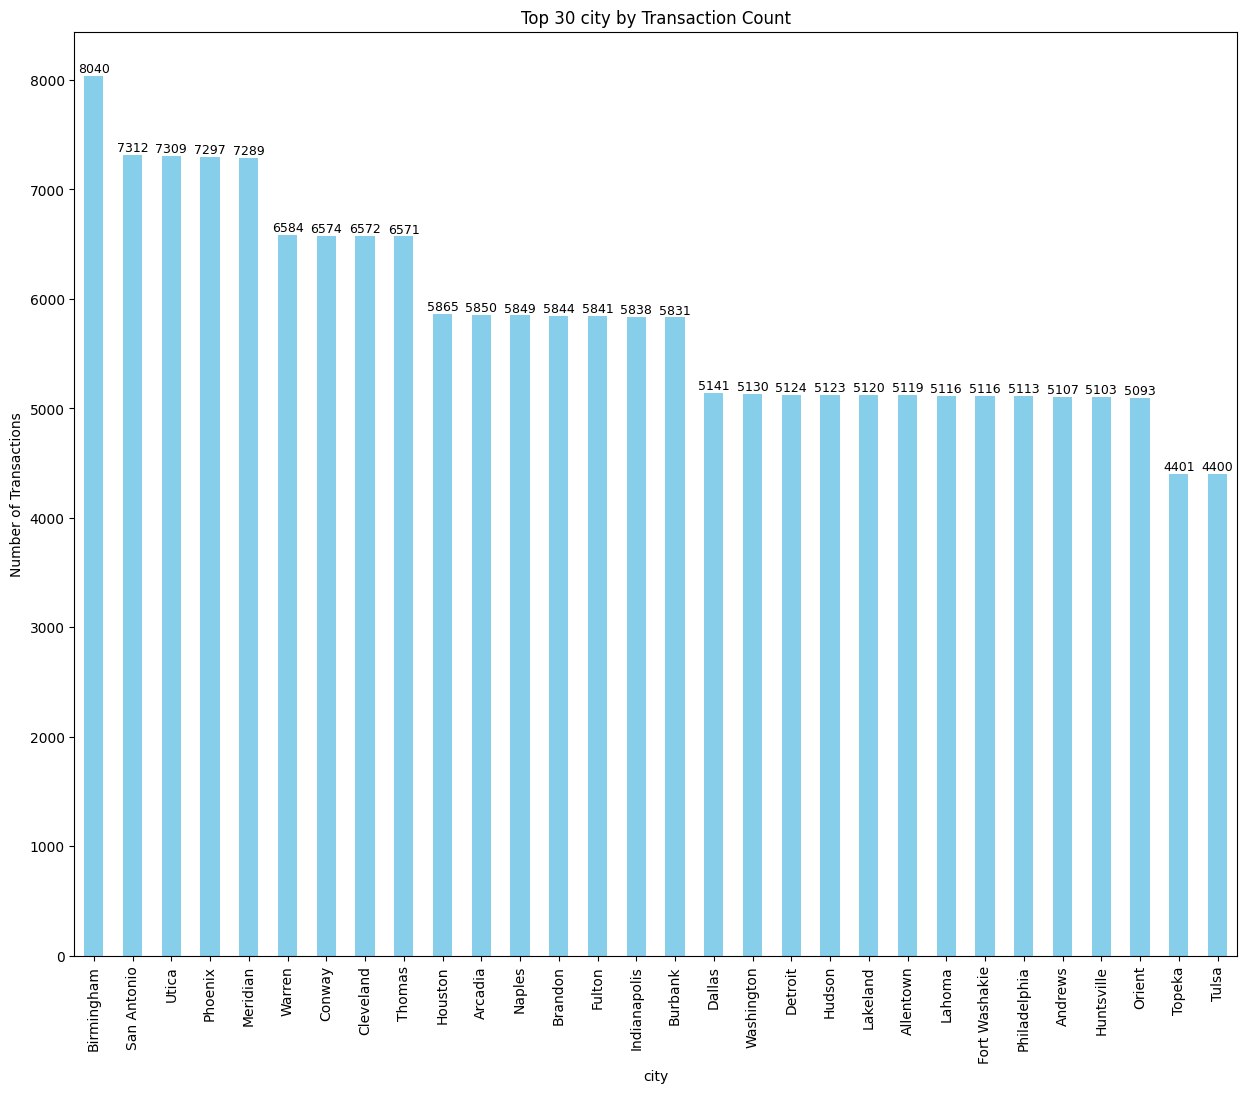

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Get the top 30 merchants
top_30_city = df['city'].value_counts().head(30)

# Plot the histogram
plt.figure(figsize=(15, 12))
bars = top_30_city.plot(kind='bar', color='skyblue')
plt.title('Top 30 city by Transaction Count')
plt.xlabel('city')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate the top of each bar with the count
for i, count in enumerate(top_30_city):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=9)

plt.show()


12. state

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
len(set(df['state']))

51

### Top 30 States by Transaction Count

The transaction counts for the top 30 states range from 135,269 to 27,040, showing a consistent and evenly distributed transaction volume across these locations.

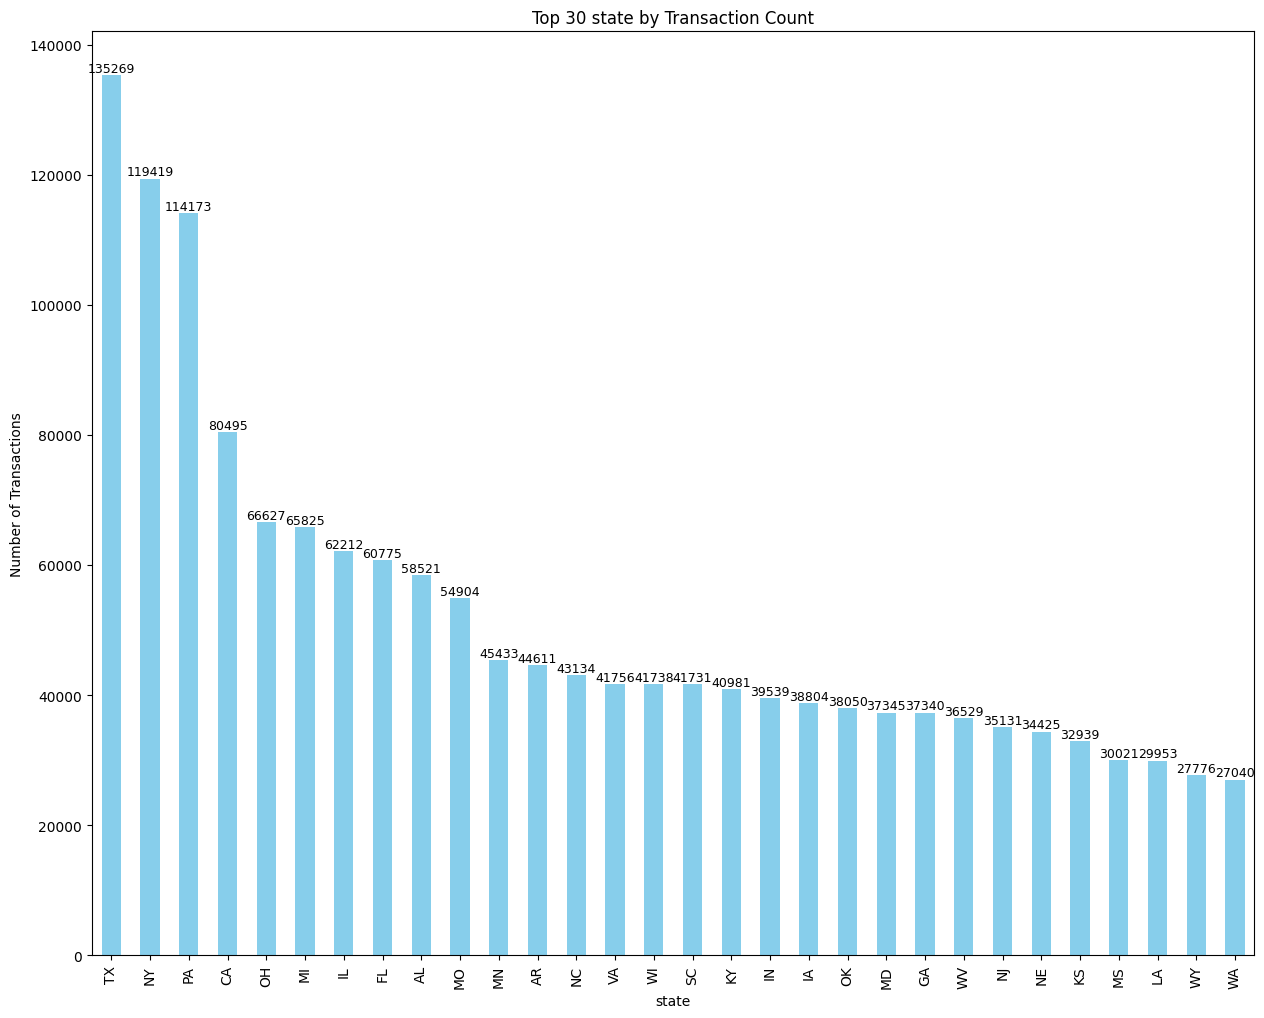

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 30 merchants
top_30_state = df['state'].value_counts().head(30)

# Plot the histogram
plt.figure(figsize=(15, 12))
bars = top_30_state.plot(kind='bar', color='skyblue')
plt.title('Top 30 state by Transaction Count')
plt.xlabel('state')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate the top of each bar with the count
for i, count in enumerate(top_30_state):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=9)

plt.show()


13. zip

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['zip']

0          28654
1          99160
2          83252
3          59632
4          24433
           ...  
1852389    63453
1852390    77566
1852391    99323
1852392    83643
1852393    73034
Name: zip, Length: 1852394, dtype: int64

Zip's scatter plot is not suitable for understanding.

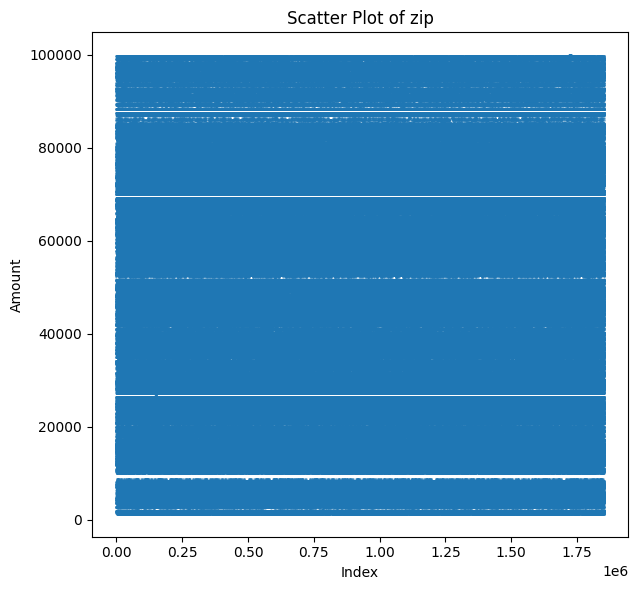

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['zip'], alpha=0.5, s=1)
plt.title('Scatter Plot of zip')
plt.xlabel('Index')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

### Box Plot for ZIP

- **Min**: 1257.00
- **Q1**: 26237.00
- **Median (Q2)**: 48174.00
- **Q3**: 72042.00
- **Max**: 99921.00
- **Outliers**: 0

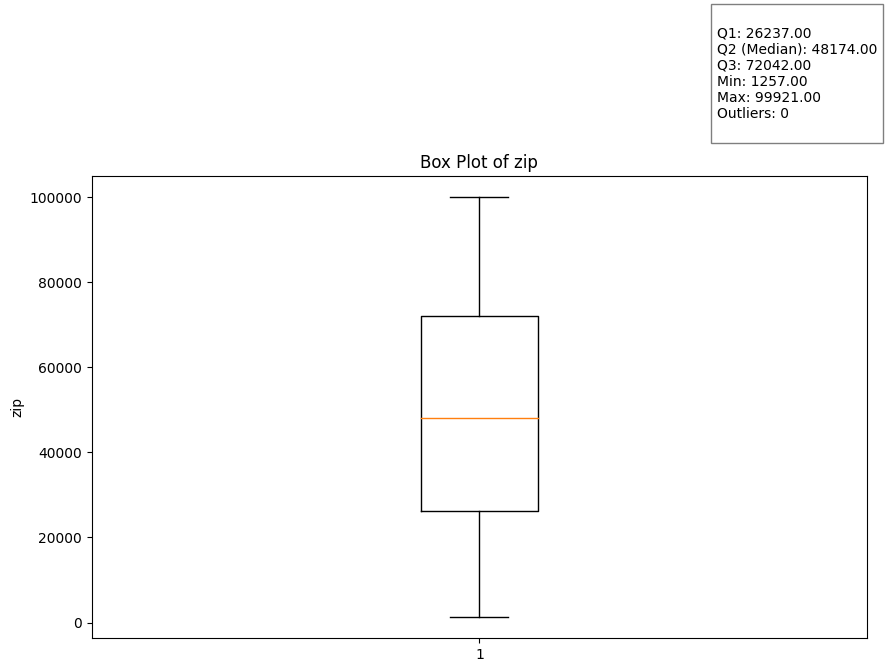

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate statistics
q1 = df['zip'].quantile(0.25)
q2 = df['zip'].median()
q3 = df['zip'].quantile(0.75)
iqr = q3 - q1
min_val = df['zip'].min()
max_val = df['zip'].max()
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['zip'] < lower_bound) | (df['zip'] > upper_bound)]

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['zip'])
plt.ylabel('zip')
plt.title('Box Plot of zip')

# Create a text box with summary statistics
stats_text = f"""
Q1: {q1:.2f}
Q2 (Median): {q2:.2f}
Q3: {q3:.2f}
Min: {min_val:.2f}
Max: {max_val:.2f}
Outliers: {outliers.shape[0]}
"""

# Add text box to the plot
plt.gcf().text(0.75, 0.95, stats_text, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

14. lat

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['lat']

0          36.0788
1          48.8878
2          42.1808
3          46.2306
4          38.4207
            ...   
1852389    40.4931
1852390    29.0393
1852391    46.1966
1852392    44.6255
1852393    35.6665
Name: lat, Length: 1852394, dtype: float64

Lat's scatter plot is not suitable for understanding.

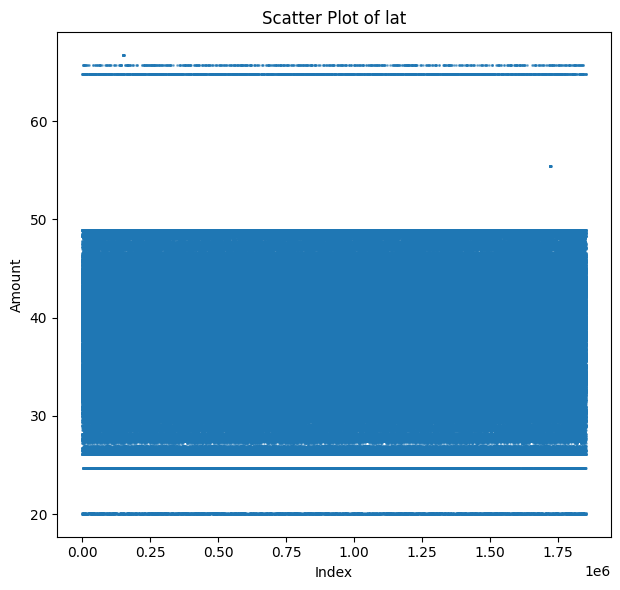

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['lat'], alpha=0.5, s=1)
plt.title('Scatter Plot of lat')
plt.xlabel('Index')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

### Box Plot for Latitude (lat)

- **Min**: 20.03
- **Q1**: 34.67
- **Median (Q2)**: 39.35
- **Q3**: 41.94
- **Max**: 66.69
- **Outliers**: 6612

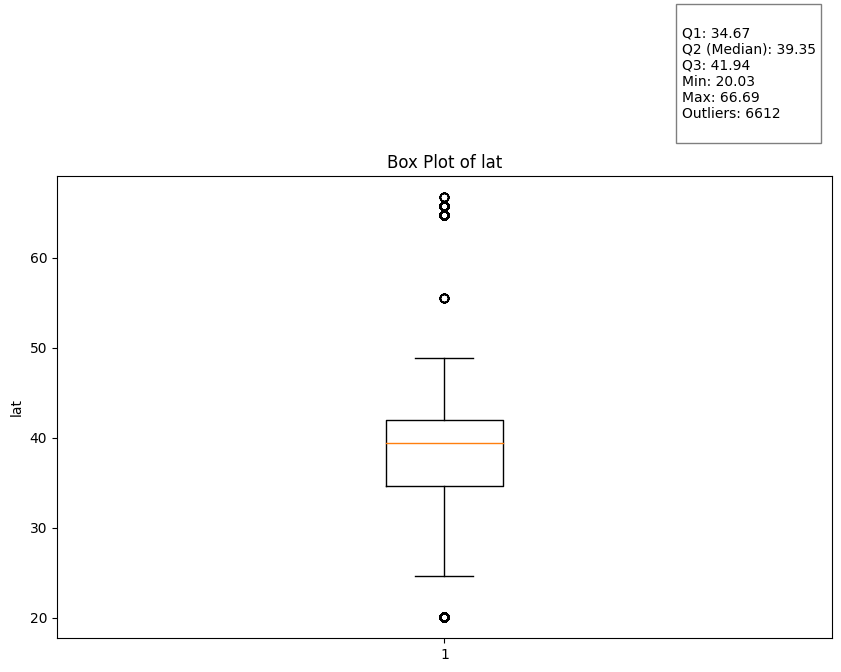

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate statistics
q1 = df['lat'].quantile(0.25)
q2 = df['lat'].median()
q3 = df['lat'].quantile(0.75)
iqr = q3 - q1
min_val = df['lat'].min()
max_val = df['lat'].max()
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['lat'] < lower_bound) | (df['lat'] > upper_bound)]

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['lat'])
plt.ylabel('lat')
plt.title('Box Plot of lat')

# Create a text box with summary statistics
stats_text = f"""
Q1: {q1:.2f}
Q2 (Median): {q2:.2f}
Q3: {q3:.2f}
Min: {min_val:.2f}
Max: {max_val:.2f}
Outliers: {outliers.shape[0]}
"""

# Add text box to the plot
plt.gcf().text(0.75, 0.95, stats_text, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

15. long

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['long']

0          -81.1781
1         -118.2105
2         -112.2620
3         -112.1138
4          -79.4629
             ...   
1852389    -91.8912
1852390    -95.4401
1852391   -118.9017
1852392   -116.4493
1852393    -97.4798
Name: long, Length: 1852394, dtype: float64

Long's scatter plot is not suitable for understanding.

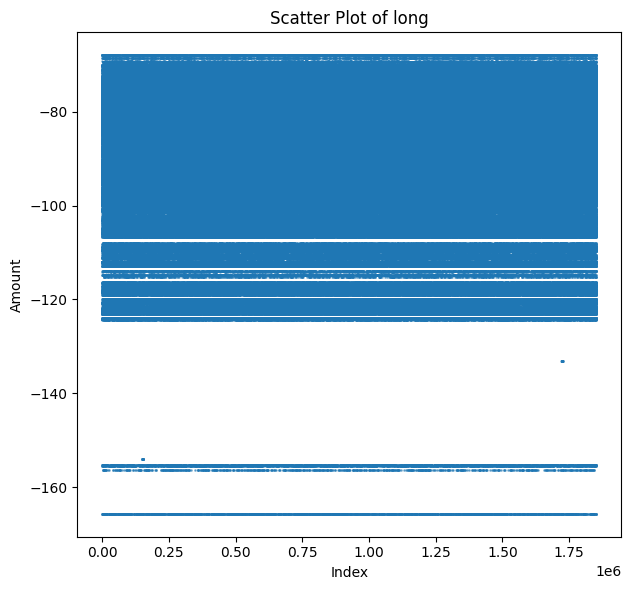

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['long'], alpha=0.5, s=1)
plt.title('Scatter Plot of long')
plt.xlabel('Index')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

### Box Plot for Longitude (long)

- **Min**: -165.67
- **Q1**: -96.80
- **Median (Q2)**: -87.48
- **Q3**: -80.16
- **Max**: -67.95
- **Outliers**: 71,026

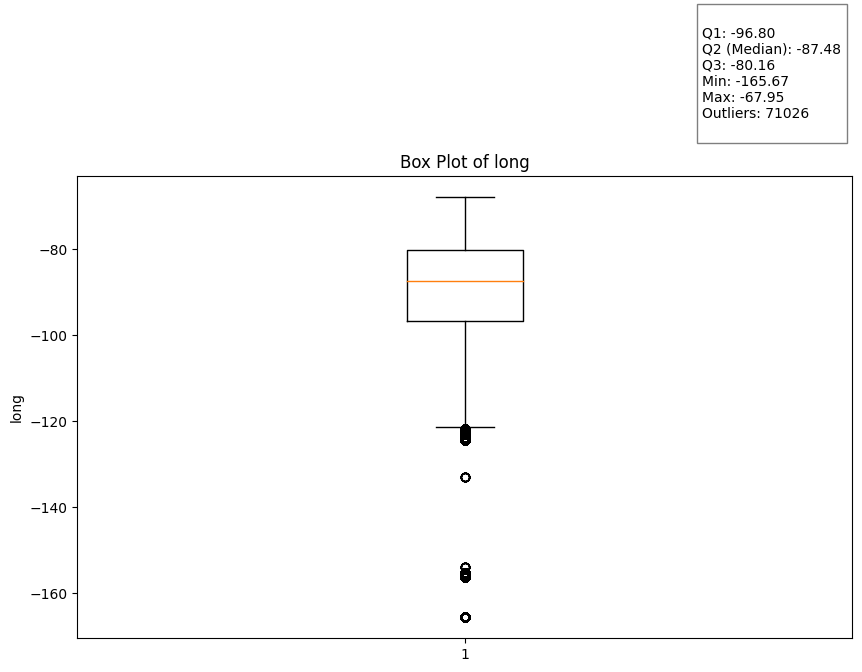

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate statistics
q1 = df['long'].quantile(0.25)
q2 = df['long'].median()
q3 = df['long'].quantile(0.75)
iqr = q3 - q1
min_val = df['long'].min()
max_val = df['long'].max()
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['long'] < lower_bound) | (df['long'] > upper_bound)]

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['long'])
plt.ylabel('long')
plt.title('Box Plot of long')

# Create a text box with summary statistics
stats_text = f"""
Q1: {q1:.2f}
Q2 (Median): {q2:.2f}
Q3: {q3:.2f}
Min: {min_val:.2f}
Max: {max_val:.2f}
Outliers: {outliers.shape[0]}
"""

# Add text box to the plot
plt.gcf().text(0.75, 0.95, stats_text, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

16. city_pop

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['city_pop']

0            3495
1             149
2            4154
3            1939
4              99
            ...  
1852389       519
1852390     28739
1852391      3684
1852392       129
1852393    116001
Name: city_pop, Length: 1852394, dtype: int64

### Scatter Plot of `city_pop`

- **X-axis**: Index
- **Y-axis**: Amount
- **Observation**: The plot shows distinct horizontal lines, indicating multiple transactions at specific population amounts. The majority of data points are concentrated below 1 million in amount.

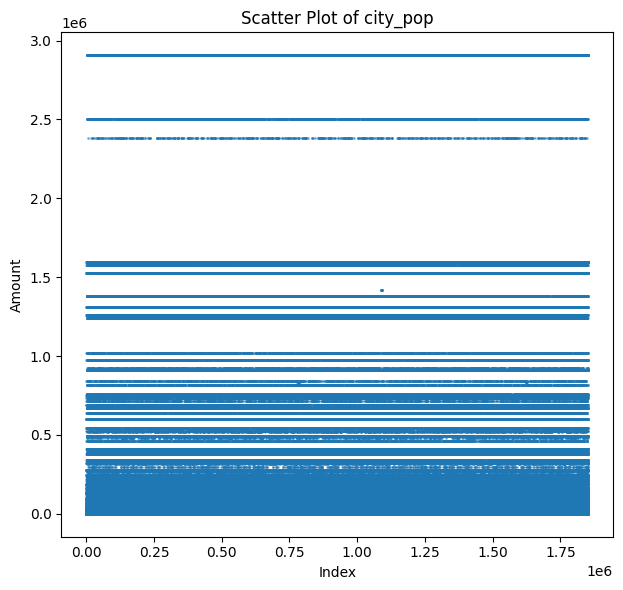

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['city_pop'], alpha=0.5, s=1)
plt.title('Scatter Plot of city_pop')
plt.xlabel('Index')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

### Box Plot of `city_pop`

- **Q1 (25th percentile)**: 741
- **Median (Q2/50th percentile)**: 2443
- **Q3 (75th percentile)**: 20328
- **Minimum**: 23
- **Maximum**: 2,906,700
- **Outliers**: 346,191

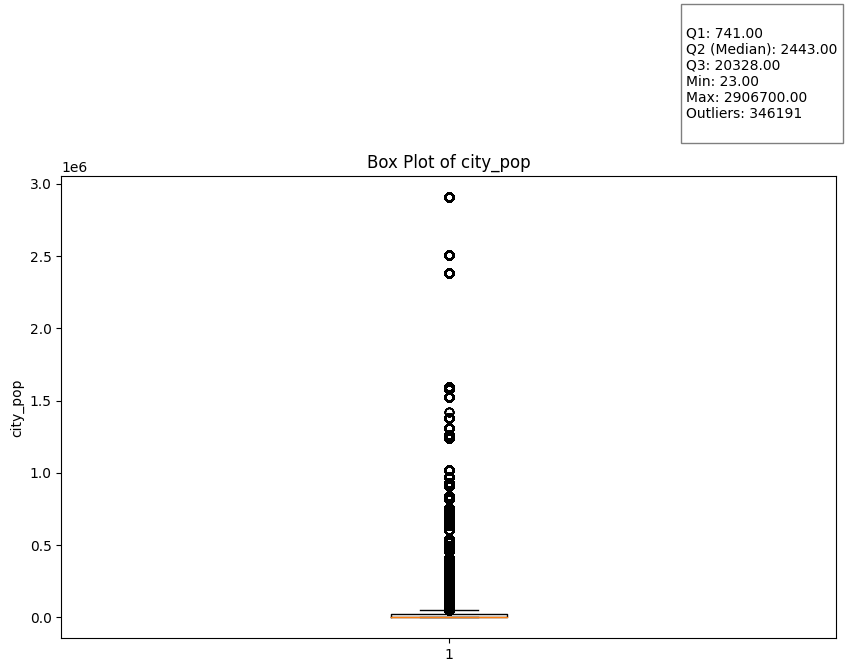

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate statistics
q1 = df['city_pop'].quantile(0.25)
q2 = df['city_pop'].median()
q3 = df['city_pop'].quantile(0.75)
iqr = q3 - q1
min_val = df['city_pop'].min()
max_val = df['city_pop'].max()
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['city_pop'] < lower_bound) | (df['city_pop'] > upper_bound)]

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['city_pop'])
plt.ylabel('city_pop')
plt.title('Box Plot of city_pop')

# Create a text box with summary statistics
stats_text = f"""
Q1: {q1:.2f}
Q2 (Median): {q2:.2f}
Q3: {q3:.2f}
Min: {min_val:.2f}
Max: {max_val:.2f}
Outliers: {outliers.shape[0]}
"""

# Add text box to the plot
plt.gcf().text(0.75, 0.95, stats_text, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

17. job

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['job']

0                  Psychologist, counselling
1          Special educational needs teacher
2                Nature conservation officer
3                            Patent attorney
4             Dance movement psychotherapist
                         ...                
1852389                         Town planner
1852390                       Futures trader
1852391                             Musician
1852392                         Cartographer
1852393                          Media buyer
Name: job, Length: 1852394, dtype: object

### Top 30 Jobs by Transaction Count

- **Highest**: Film/video editor (13,898 transactions)
- **Second Highest**: Exhibition designer (13,167 transactions)
- **Third Highest**: Surveyor, land/geomatics (12,436 transactions)
                     
The remaining jobs range from 11,711 to 8,760 transactions, with Immunologist being the lowest among the top 30.                           

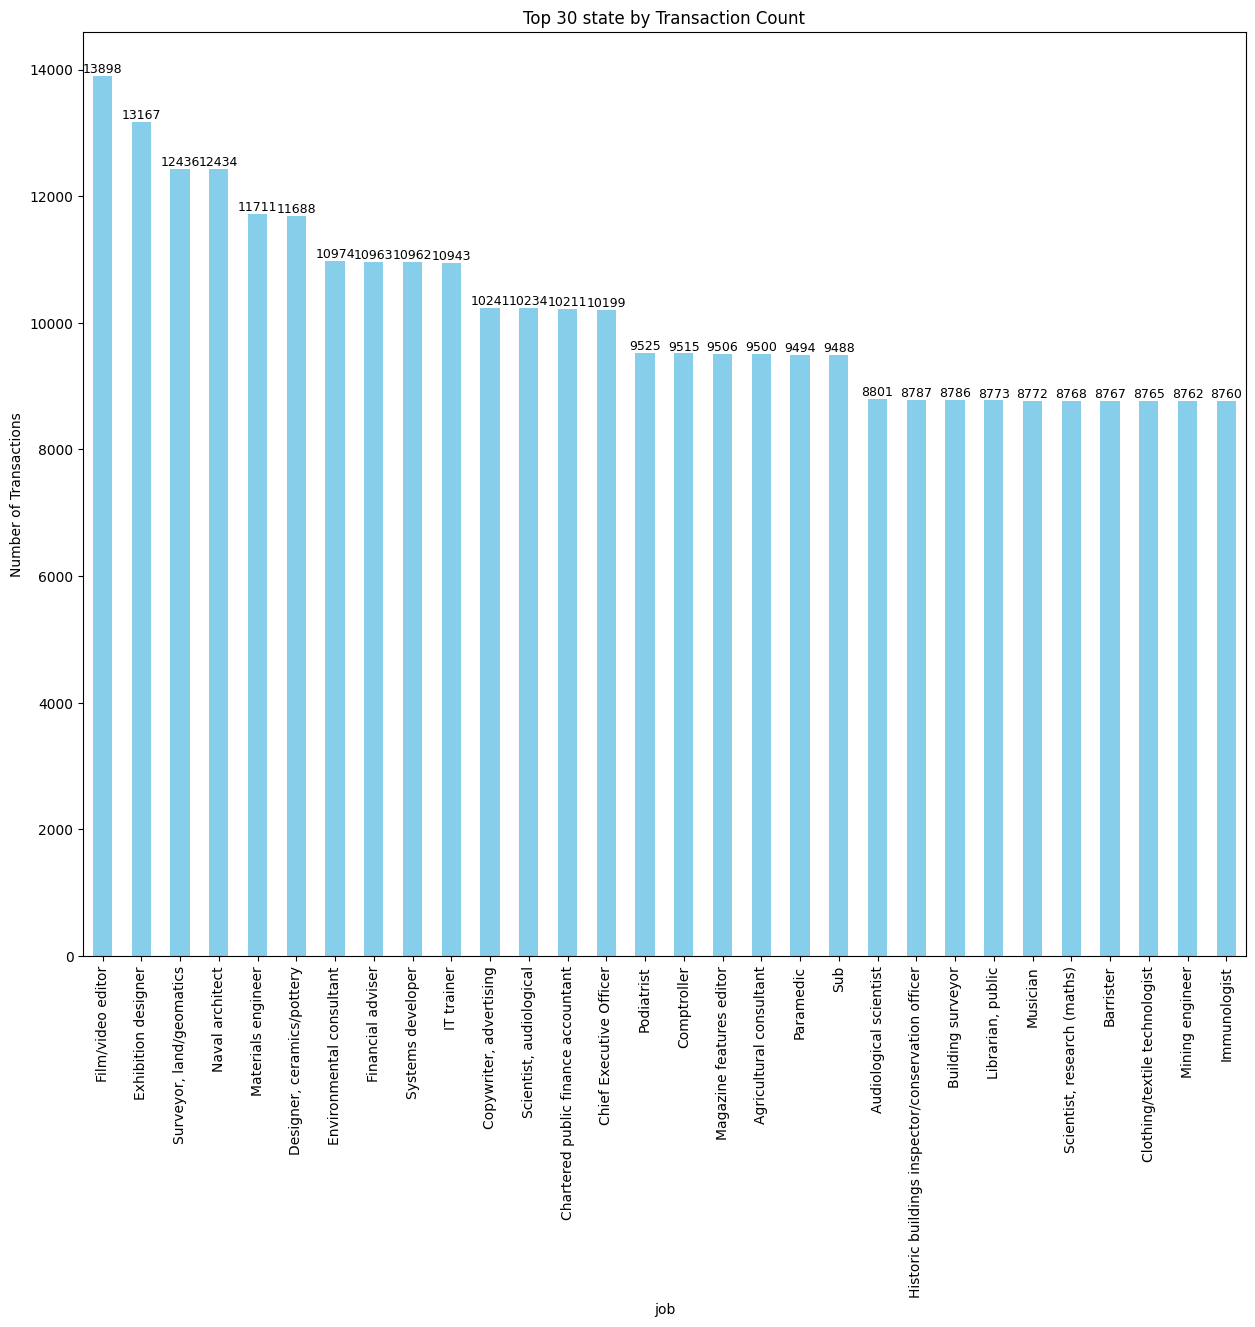

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 30 merchants
top_30_job = df['job'].value_counts().head(30)

# Plot the histogram
plt.figure(figsize=(15, 12))
bars = top_30_job.plot(kind='bar', color='skyblue')
plt.title('Top 30 state by Transaction Count')
plt.xlabel('job')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Annotate the top of each bar with the count
for i, count in enumerate(top_30_job):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=9)
plt.show()

18. dob

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['dob']

0          1988-03-09
1          1978-06-21
2          1962-01-19
3          1967-01-12
4          1986-03-28
              ...    
1852389    1966-02-13
1852390    1999-12-27
1852391    1981-11-29
1852392    1965-12-15
1852393    1993-05-10
Name: dob, Length: 1852394, dtype: object

Converting the 'trans_date_trans_time' column to datetime is necessary to perform accurate time-based analysis and operations, such as filtering, sorting, and aggregating transactions by date or time intervals.

In [ ]:
# Convert the 'trans_date_trans_time' column to datetime
df['dob'] = pd.to_datetime(df['dob'])

# Verify the conversion
df['dob'].head()

0   1988-03-09
1   1978-06-21
2   1962-01-19
3   1967-01-12
4   1986-03-28
Name: dob, dtype: datetime64[ns]

In [ ]:
df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [ ]:
df['dob'].min(), df['dob'].max()

(Timestamp('1924-10-30 00:00:00'), Timestamp('2005-01-29 00:00:00'))

For individuals born after 1980, the fraud distribution is 0.47% (almost 0.5%) for fraud cases and 99.53% (almost 99.5%) for non-fraud cases. For individuals born on or before 1980, the fraud distribution is 0.56% (almost 0.6%) for fraud cases and 99.44% (almost 99.4%) for non-fraud cases.

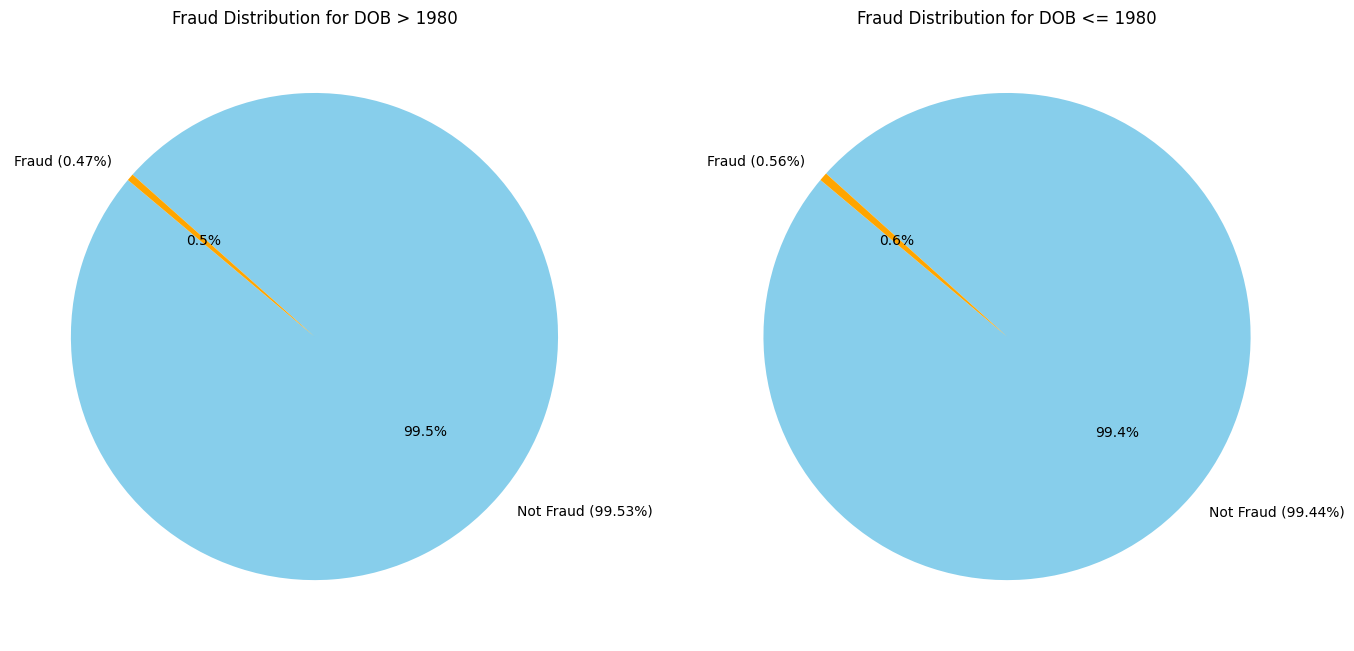

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['dob'] = pd.to_datetime(df['dob'])

# Filter data based on the year 1980
greater_than_1980 = df[df['dob'].dt.year > 1980]
less_than_1980 = df[df['dob'].dt.year <= 1980]

# Calculate fraud counts and percentages for each group
def fraud_summary(df):
    fraud_counts = df['is_fraud'].value_counts()
    fraud_percentages = (fraud_counts / len(df)) * 100
    return fraud_counts, fraud_percentages

# Greater than 1980
greater_counts, greater_percentages = fraud_summary(greater_than_1980)

# Less than or equal to 1980
less_counts, less_percentages = fraud_summary(less_than_1980)

# Plotting pie charts
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for greater than 1980
axs[0].pie(greater_counts, labels=[f'Not Fraud ({greater_percentages[0]:.2f}%)', f'Fraud ({greater_percentages[1]:.2f}%)'],
           autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
axs[0].set_title('Fraud Distribution for DOB > 1980')

# Pie chart for less than or equal to 1980
axs[1].pie(less_counts, labels=[f'Not Fraud ({less_percentages[0]:.2f}%)', f'Fraud ({less_percentages[1]:.2f}%)'],
           autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
axs[1].set_title('Fraud Distribution for DOB <= 1980')

plt.tight_layout()
plt.show()

19. trans_num

That is unnecessary so it is better for remove.

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['trans_num']

0          0b242abb623afc578575680df30655b9
1          1f76529f8574734946361c461b024d99
2          a1a22d70485983eac12b5b88dad1cf95
3          6b849c168bdad6f867558c3793159a81
4          a41d7549acf90789359a9aa5346dcb46
                         ...               
1852389    9b1f753c79894c9f4b71f04581835ada
1852390    2090647dac2c89a1d86c514c427f5b91
1852391    6c5b7c8add471975aa0fec023b2e8408
1852392    14392d723bb7737606b2700ac791b7aa
1852393    1765bb45b3aa3224b4cdcb6e7a96cee3
Name: trans_num, Length: 1852394, dtype: object

In [ ]:
# Drop 'trans_num' column
df = df.drop(columns=['trans_num'])
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

20. unix_time

In [ ]:
df['unix_time']

0          1325376018
1          1325376044
2          1325376051
3          1325376076
4          1325376186
              ...    
1852389    1388534347
1852390    1388534349
1852391    1388534355
1852392    1388534364
1852393    1388534374
Name: unix_time, Length: 1852394, dtype: int64

The scatter plot provided displays the relationship between the `Index` (on the x-axis) and `Amount` (on the y-axis), with the title "Scatter Plot of unix_time." The `Amount` increases consistently as the `Index` increases, indicating a positive correlation between the two variables. The trend suggests a linear or near-linear relationship, with the `Amount` steadily rising as the `Index` progresses.

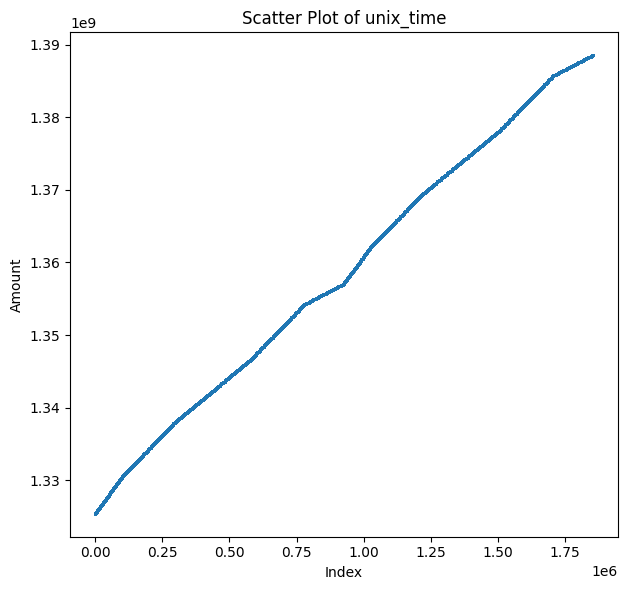

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['unix_time'], alpha=0.5, s=1)
plt.title('Scatter Plot of unix_time')
plt.xlabel('Index')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

The provided data can be visualized using a box plot to summarize the distribution of unix_time.

Q1 (First Quartile): 1,343,016,823.75
Q2 (Median/Second Quartile): 1,357,089,331.00
Q3 (Third Quartile): 1,374,581,485.25
Min (Minimum): 1,325,376,018
Max (Maximum): 1,388,534,374
Outliers: 0

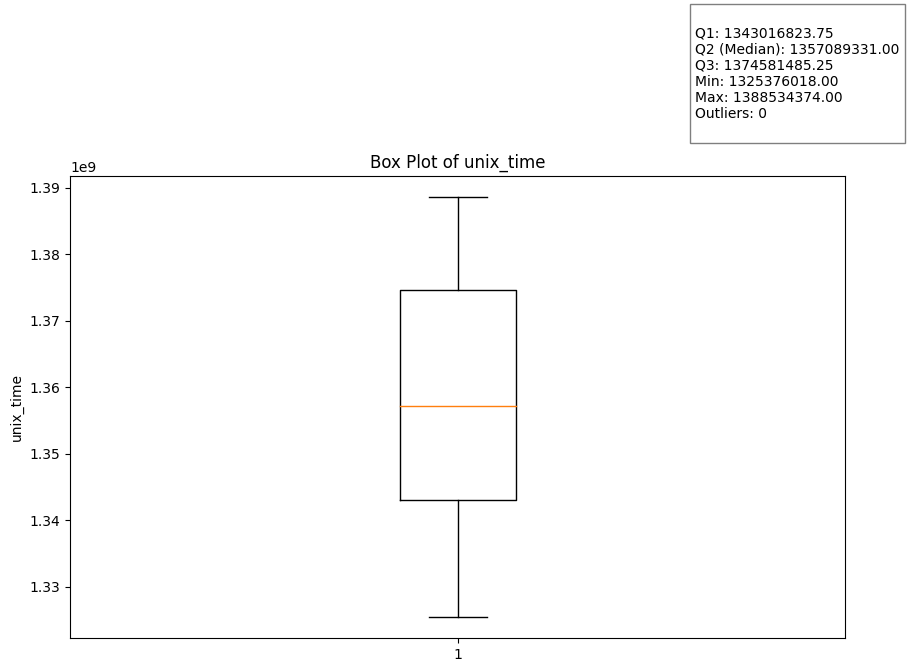

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate statistics
q1 = df['unix_time'].quantile(0.25)
q2 = df['unix_time'].median()
q3 = df['unix_time'].quantile(0.75)
iqr = q3 - q1
min_val = df['unix_time'].min()
max_val = df['unix_time'].max()
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['unix_time'] < lower_bound) | (df['unix_time'] > upper_bound)]

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['unix_time'])
plt.ylabel('unix_time')
plt.title('Box Plot of unix_time')

# Create a text box with summary statistics
stats_text = f"""
Q1: {q1:.2f}
Q2 (Median): {q2:.2f}
Q3: {q3:.2f}
Min: {min_val:.2f}
Max: {max_val:.2f}
Outliers: {outliers.shape[0]}
"""

# Add text box to the plot
plt.gcf().text(0.75, 0.95, stats_text, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

21. merch_lat

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['merch_lat']

0          36.011293
1          49.159047
2          43.150704
3          47.034331
4          38.674999
             ...    
1852389    39.946837
1852390    29.661049
1852391    46.658340
1852392    44.470525
1852393    36.210097
Name: merch_lat, Length: 1852394, dtype: float64

The scatter plot shows `merch_lat` values on the y-axis against an `Index` on the x-axis. The data points are clustered around specific latitude bands, indicating distinct groups of latitude values with high concentration.

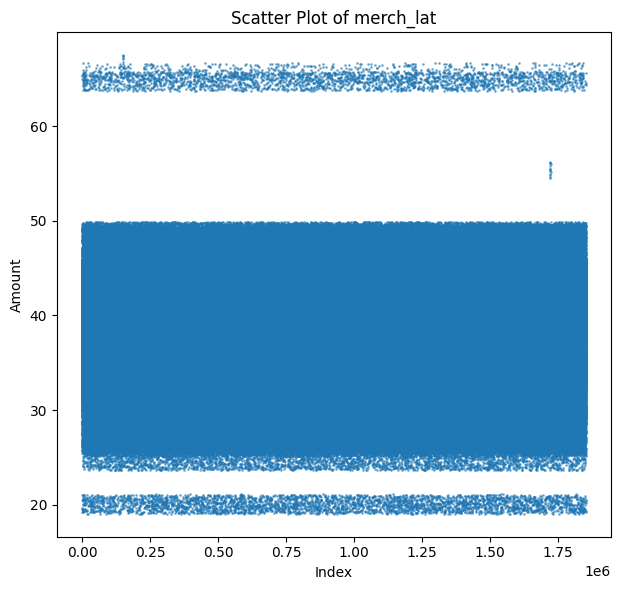

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['merch_lat'], alpha=0.5, s=1)
plt.title('Scatter Plot of merch_lat')
plt.xlabel('Index')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

### Box plot of merch_lat

Q1 (First Quartile): 34.74
Q2 (Median/Second Quartile): 39.37
Q3 (Third Quartile): 41.96
Min (Minimum): 19.03
Max (Maximum): 67.51
Outliers: 7063

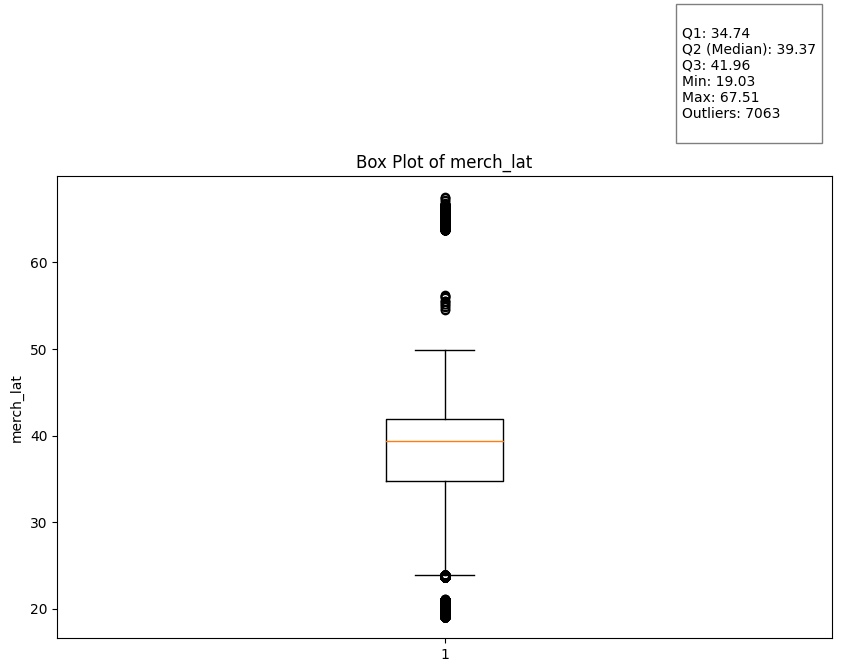

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate statistics
q1 = df['merch_lat'].quantile(0.25)
q2 = df['merch_lat'].median()
q3 = df['merch_lat'].quantile(0.75)
iqr = q3 - q1
min_val = df['merch_lat'].min()
max_val = df['merch_lat'].max()
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['merch_lat'] < lower_bound) | (df['merch_lat'] > upper_bound)]

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['merch_lat'])
plt.ylabel('merch_lat')
plt.title('Box Plot of merch_lat')

# Create a text box with summary statistics
stats_text = f"""
Q1: {q1:.2f}
Q2 (Median): {q2:.2f}
Q3: {q3:.2f}
Min: {min_val:.2f}
Max: {max_val:.2f}
Outliers: {outliers.shape[0]}
"""

# Add text box to the plot
plt.gcf().text(0.75, 0.95, stats_text, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

22. merch_long

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['merch_long']

0          -82.048315
1         -118.186462
2         -112.154481
3         -112.561071
4          -78.632459
              ...    
1852389    -91.333331
1852390    -96.186633
1852391   -119.715054
1852392   -117.080888
1852393    -97.036372
Name: merch_long, Length: 1852394, dtype: float64

The scatter plot displays the merch_long values on the y-axis against the Index on the x-axis. The data points are concentrated in distinct bands, suggesting several clusters of longitude values with a high concentration of points around specific ranges.

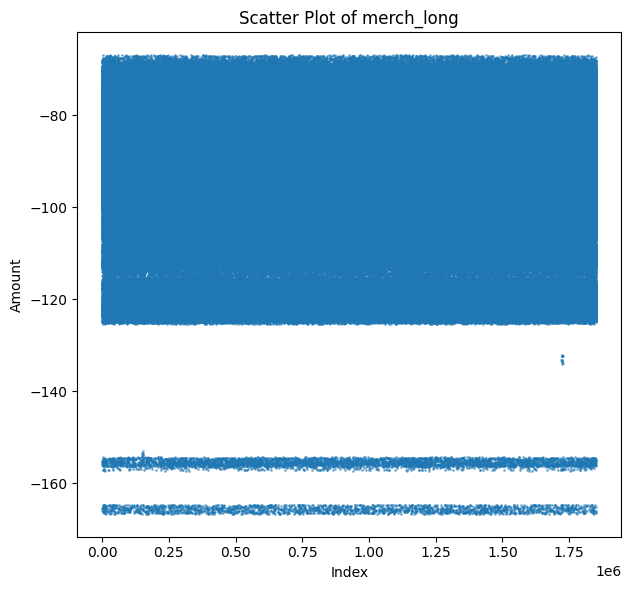

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['merch_long'], alpha=0.5, s=1)
plt.title('Scatter Plot of merch_long')
plt.xlabel('Index')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

### Summary of merch_long

- **Q1 (First Quartile)**: -96.90
- **Q2 (Median/Second Quartile)**: -87.44
- **Q3 (Third Quartile)**: -80.25
- **Min (Minimum)**: -166.67
- **Max (Maximum)**: -66.95
- **Outliers**: 59,972

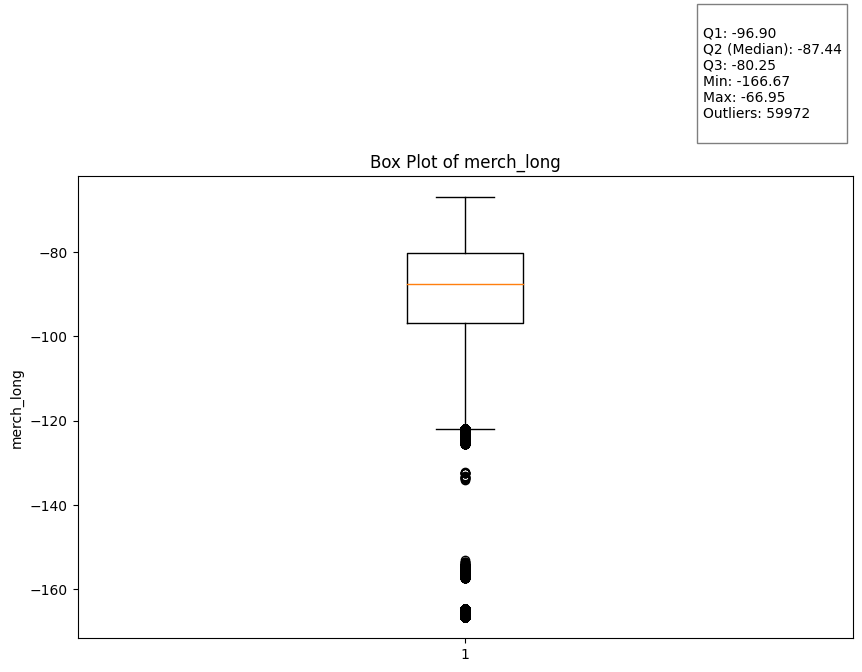

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate statistics
q1 = df['merch_long'].quantile(0.25)
q2 = df['merch_long'].median()
q3 = df['merch_long'].quantile(0.75)
iqr = q3 - q1
min_val = df['merch_long'].min()
max_val = df['merch_long'].max()
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['merch_long'] < lower_bound) | (df['merch_long'] > upper_bound)]

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['merch_long'])
plt.ylabel('merch_long')
plt.title('Box Plot of merch_long')

# Create a text box with summary statistics
stats_text = f"""
Q1: {q1:.2f}
Q2 (Median): {q2:.2f}
Q3: {q3:.2f}
Min: {min_val:.2f}
Max: {max_val:.2f}
Outliers: {outliers.shape[0]}
"""

# Add text box to the plot
plt.gcf().text(0.75, 0.95, stats_text, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

23. is_fraud

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['is_fraud']

0          0
1          0
2          0
3          0
4          0
          ..
1852389    0
1852390    0
1852391    0
1852392    0
1852393    0
Name: is_fraud, Length: 1852394, dtype: int64

### Distribution of is_fraud

- **0 (Non-fraudulent transactions)**: 1,842,743 (99.48%)
- **1 (Fraudulent transactions)**: 9,651 (0.52%)

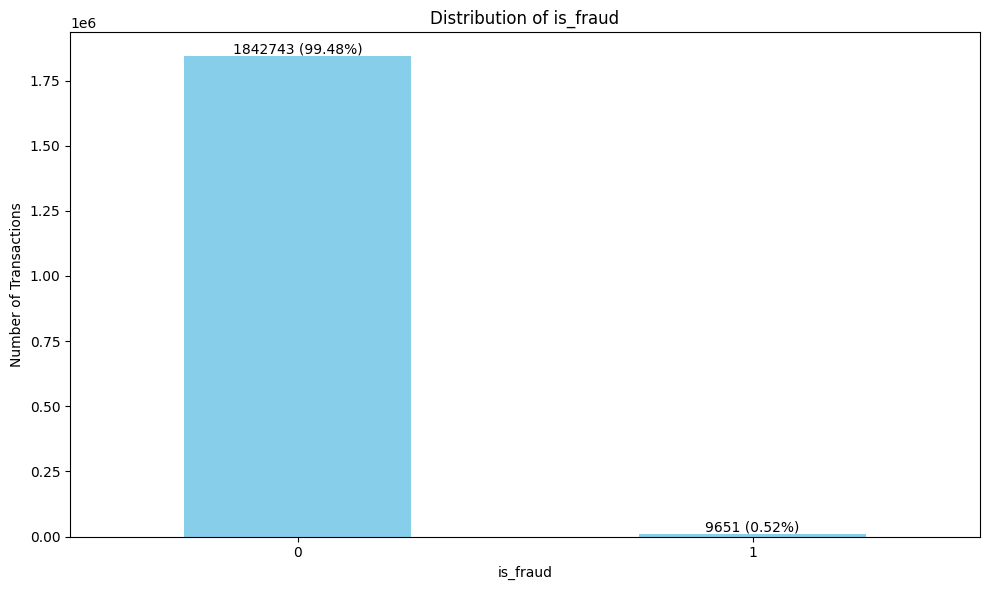

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Calculate counts and percentages
gender_counts = df['is_fraud'].value_counts()
gender_percentages = (gender_counts / len(df)) * 100

# Combine counts and percentages into a DataFrame for easy plotting
gender_summary = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_percentages
})

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = gender_summary['Count'].plot(kind='bar', color='skyblue')

# Add counts and percentages on the bars
for i, (count, percentage) in enumerate(zip(gender_summary['Count'], gender_summary['Percentage'])):
    plt.text(i, count + 5, f'{count} ({percentage:.2f}%)', ha='center', va='bottom', fontsize=10)

plt.title('Distribution of is_fraud')
plt.xlabel('is_fraud')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal
plt.tight_layout()
plt.show()

#Feature selection

It is necessary to convert categorical text data into numerical values, which is required for many machine learning algorithms that can only work with numerical input.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Encoding categorical columns
df['merchant'] = encoder.fit_transform(df['merchant'])
df['category'] = encoder.fit_transform(df['category'])
df['street'] = encoder.fit_transform(df['street'])
df['job'] = encoder.fit_transform(df['job'])
df['first'] = encoder.fit_transform(df['first'])
df['city'] = encoder.fit_transform(df['city'])
df['state'] = encoder.fit_transform(df['state'])
df['last'] = encoder.fit_transform(df['last'])
df['gender'] = encoder.fit_transform(df['gender'])
df['trans_date_trans_time'] = encoder.fit_transform(df['trans_date_trans_time'])
df['dob'] = encoder.fit_transform(df['dob'])

df.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,514,8,4.97,164,18,0,576,532,...,28654,36.0788,-81.1781,3495,372,791,1325376018,36.011293,-82.048315,0
1,1,630423337322,241,4,107.23,312,161,0,439,619,...,99160,48.8878,-118.2105,149,431,619,1325376044,49.159047,-118.186462,0
2,2,38859492057661,390,0,220.11,116,386,1,610,474,...,83252,42.1808,-112.2620,4154,308,309,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,360,2,45.00,165,468,1,945,84,...,59632,46.2306,-112.1138,1939,330,405,1325376076,47.034331,-112.561071,0
4,4,375534208663984,297,9,41.96,339,153,1,422,217,...,24433,38.4207,-79.4629,99,116,746,1325376186,38.674999,-78.632459,0


In [ ]:
df.dtypes

trans_date_trans_time      int64
cc_num                     int64
merchant                   int64
category                   int64
amt                      float64
first                      int64
last                       int64
gender                     int64
street                     int64
city                       int64
state                      int64
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                        int64
dob                        int64
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

1. Correlation Matrix Heatmap

This is a correlation heatmap showing the relationships between various features in a dataset, including `is_fraud`. Key observations:

1. Most features have low correlation with each other and with `is_fraud`.
2. `amt` (amount) has a positive correlation of 0.21 with `is_fraud`.
3. `merch_lat` and `merch_long` are highly correlated with each other and with `lat` and `long`.
4. Features like `cc_num`, `first`, `last`, `gender`, and `street` show very low or negligible correlations with `is_fraud`.

Overall, `amt` stands out as the most significant feature related to `is_fraud`.

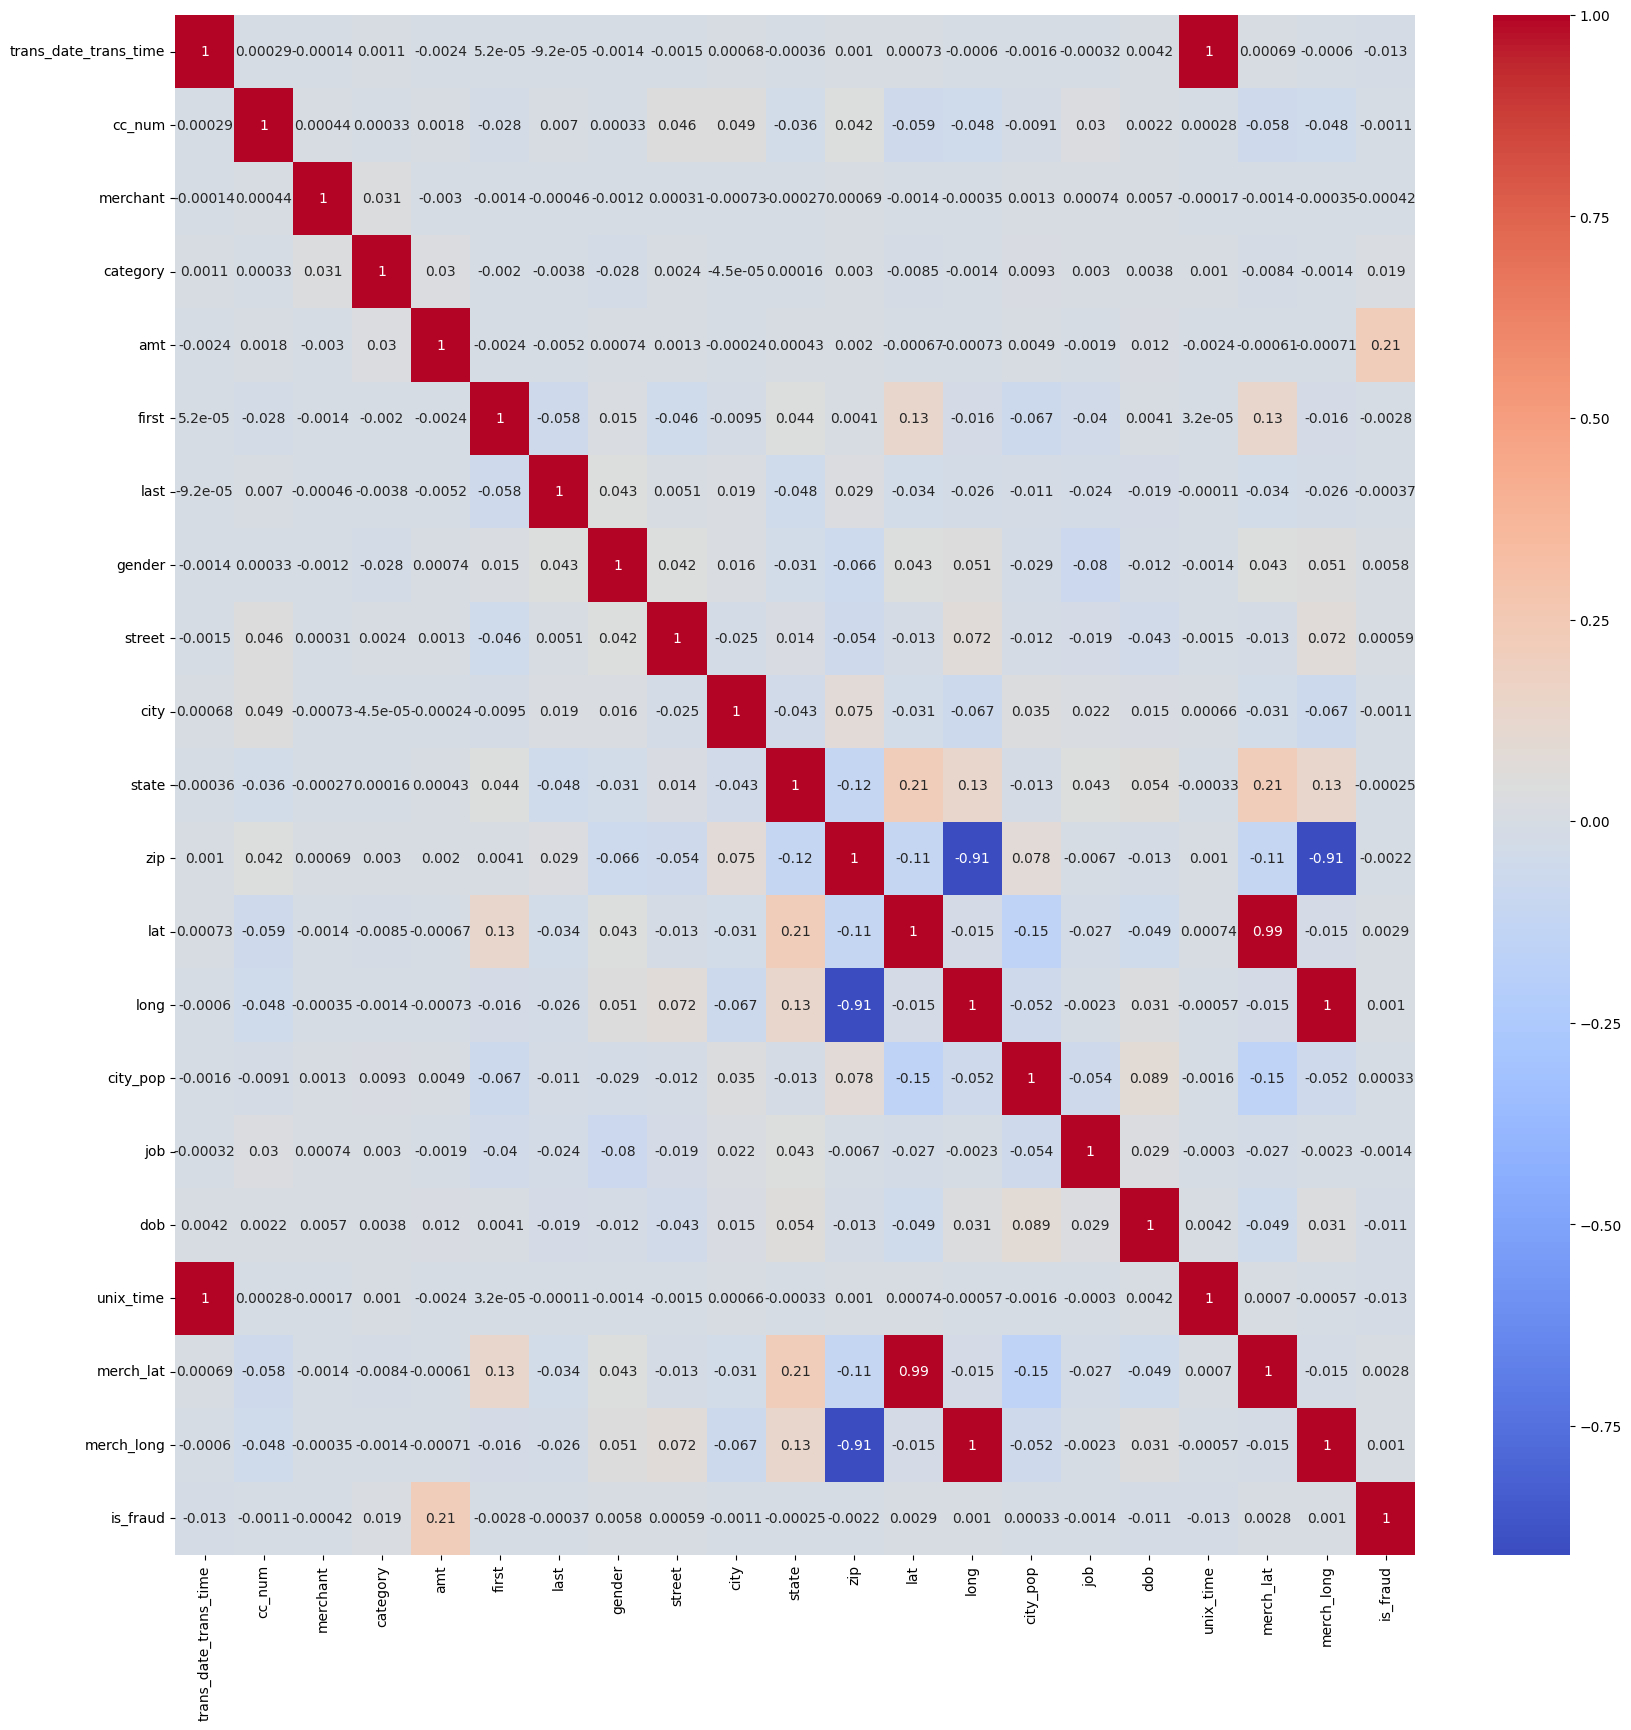

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


2. Univariate Selection

Univariate selection is a feature selection technique in machine learning that evaluates each feature individually based on statistical tests to determine its relevance to the target variable. It helps in identifying and removing irrelevant or less important features, improving model performance and simplicity.

### Common Techniques
- **Chi-Squared Test (Chi2):** For categorical data.
- **ANOVA F-test:** For numerical data.
- **Mutual Information:** For both categorical and continuous data.
- **SelectKBest:** Selects top K features based on their scores.

### Steps Involved
1. **Choose a Statistical Test:** Based on the type of data.
2. **Compute Scores:** Calculate the score for each feature.
3. **Rank Features:** Sort features by their scores.
4. **Select Top Features:** Choose the best features based on scores or a threshold.

### Benefits
- **Simplifies Model:** Reduces complexity by removing less important features.
- **Improves Performance:** Enhances model accuracy.
- **Reduces Overfitting:** Eliminates noisy features.

### Limitations
- **Ignores Feature Interactions:** Considers each feature independently.
- **May Exclude Important Features:** Some features might be important only in interaction with others.

Univariate selection is a straightforward and efficient method to enhance model performance by focusing on the most relevant features.

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Select numeric features only
numeric_features = df.select_dtypes(include=[float, int]).columns.tolist()

# Check for negative values in numeric features
negative_value_cols = X.columns[(X < 0).any()].tolist()
print(f"Columns with negative values: {negative_value_cols}")

# Handle negative values: Replace negative values with 0 for 'long' and 'merch_long'
if 'long' in negative_value_cols:
    X['long'] = X['long'].clip(lower=0)

if 'merch_long' in negative_value_cols:
    X['merch_long'] = X['merch_long'].clip(lower=0)

# Select the top 10 features using chi-squared test
y = df['is_fraud']

best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)

# Get the scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate two dataframes for better visualization
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Feature', 'Score']
print(feature_scores.nlargest(10, 'Score'))


Columns with negative values: []
                  Feature         Score
1                  cc_num  9.622571e+18
0   trans_date_trans_time  9.908706e+07
17              unix_time  8.018760e+07
4                     amt  2.937599e+07
20               is_fraud  1.842743e+06
14               city_pop  2.008679e+05
11                    zip  1.315667e+05
16                    dob  3.123842e+04
3                category  1.692124e+03
5                   first  7.693602e+02


3. Recursive Feature Elimination (RFE)

It is a feature selection technique in machine learning that recursively removes the least important features based on a model's performance, improving model accuracy and reducing overfitting.

### Steps Involved
1. **Fit Model:** Train a model on the full set of features.
2. **Rank Features:** Evaluate the importance of each feature.
3. **Remove Least Important Feature:** Eliminate the least important feature.
4. **Repeat:** Continue the process until the desired number of features is reached.

### Benefits
- **Improves Model Performance:** Enhances accuracy by removing irrelevant features.
- **Reduces Overfitting:** Simplifies the model by focusing on important features.

### Limitations
- **Computationally Intensive:** Can be slow for large datasets.
- **Depends on Initial Model:** The quality of feature selection depends on the initial model's performance.

RFE is a powerful method for feature selection, iteratively refining the feature set to enhance model performance.

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)  # Example: Select top 5 features
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Print the selected features
selected_features = X.columns[fit.support_]
print(selected_features)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Num Features: 10
Selected Features: [False False  True False  True False  True False  True  True False  True
 False False  True  True  True  True False False False]
Feature Ranking: [12 11  1  7  1  2  1  8  1  1  5  1  4 10  1  1  1  1  3  9  6]
Index(['merchant', 'amt', 'last', 'street', 'city', 'zip', 'city_pop', 'job',
       'dob', 'unix_time'],
      dtype='object')


### Feature Importance of Models

**Feature importance** identifies the significance of each feature in predicting the target variable in a machine learning model. It helps understand which features contribute the most to the model's predictions.

### Feature Ranking Example

1. **is_fraud:** 0.862711
2. **amt:** 0.099316
3. **category:** 0.014866
4. **dob:** 0.003869
5. **trans_date_trans_time:** 0.002453
6. **city_pop:** 0.002391
7. **unix_time:** 0.002203
8. **gender:** 0.001549
9. **merch_lat:** 0.001516
10. **zip:** 0.001236
11. **merchant:** 0.001190
12. **lat:** 0.001077
13. **street:** 0.000975
14. **job:** 0.000943
15. **cc_num:** 0.000807
16. **first:** 0.000780
17. **city:** 0.000779
18. **last:** 0.000777
19. **state:** 0.000561
20. **long:** 0.000000
21. **merch_long:** 0.000000

### Key Insights
- **High Importance:** `is_fraud` (0.862711) and `amt` (0.099316) are the most important features.
- **Moderate Importance:** Features like `category`, `dob`, and `trans_date_trans_time` have moderate importance.
- **Low Importance:** Features such as `state`, `long`, and `merch_long` have minimal or zero importance.

### Benefits
- **Model Interpretation:** Understands the model's decision-making process.
- **Feature Selection:** Helps in selecting the most relevant features.
- **Improves Performance:** Focuses on important features, reducing overfitting.

### Limitations
- **Model-Specific:** Importance scores can vary across different models.
- **Interdependence:** May not capture feature interactions.

Feature importance is essential for model interpretation and feature selection, enhancing machine learning models' efficiency and accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. feature is_fraud (0.862711)
2. feature amt (0.099316)
3. feature category (0.014866)
4. feature dob (0.003869)
5. feature trans_date_trans_time (0.002453)
6. feature city_pop (0.002391)
7. feature unix_time (0.002203)
8. feature gender (0.001549)
9. feature merch_lat (0.001516)
10. feature zip (0.001236)
11. feature merchant (0.001190)
12. feature lat (0.001077)
13. feature street (0.000975)
14. feature job (0.000943)
15. feature cc_num (0.000807)
16. feature first (0.000780)
17. feature city (0.000779)
18. feature last (0.000777)
19. feature state (0.000561)
20. feature long (0.000000)
21. feature merch_long (0.000000)


5. L1 Regularization (Lasso)
### L1 Regularization (Lasso)

**L1 Regularization (Lasso)** is a technique in machine learning used to enhance model accuracy and prevent overfitting by adding a penalty equal to the absolute value of the coefficients to the loss function.

### Key Characteristics
- **Sparsity:** Encourages many coefficients to be exactly zero, leading to simpler models.
- **Feature Selection:** Performs automatic feature selection by shrinking less important feature coefficients to zero.
- **Penalty Term:** Adds the sum of the absolute values of the coefficients (L1 norm) to the loss function.

### Benefits
- **Reduces Overfitting:** Prevents the model from fitting noise in the data.
- **Enhances Interpretability:** By shrinking coefficients to zero, it simplifies the model.
- **Automatic Feature Selection:** Identifies and retains only the most important features.

### Limitations
- **Bias Introduction:** Can introduce bias by shrinking coefficients.
- **Not Suitable for All Models:** May not perform well with highly correlated features.

L1 Regularization (Lasso) is a powerful technique for creating simpler, more interpretable models and improving generalization by performing automatic feature selection and reducing overfitting.

In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, LabelEncoder

lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

# Get coefficients
coef = pd.Series(lasso.coef_, index=X.columns)

# Select features with non-zero coefficients
selected_features = coef[coef != 0].index
print(selected_features)


Index(['trans_date_trans_time', 'cc_num', 'amt', 'first', 'city', 'zip',
       'city_pop', 'dob', 'unix_time'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.590e+03, tolerance: 9.601e-01
  model = cd_fast.enet_coordinate_descent(


#models

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

unix_time,  cc_num, city_pop,  zip,  dob,  trans_date_trans_time,  amt,  is_fraud,  category,   first, city, merchant, street, job,

In [ ]:
# Drop 'trans_num' column
df_14 = df.drop(columns=['last','gender', 'state','lat', 'long', 'merch_lat','merch_long'])
df_14.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'street', 'city', 'zip', 'city_pop', 'job', 'dob', 'unix_time',
       'is_fraud'],
      dtype='object')

### Selected Features for Fraud Detection Model

Based on various feature selection techniques including Correlation Matrix Heatmap, Univariate Selection, Recursive Feature Elimination (RFE), Feature Importance from Models, and L1 Regularization (Lasso), the following 14 features have been selected for building the fraud detection model:

1. trans_date_trans_time, 2. cc_num, 3.merchant, 4. category, 5. amt, 6. first, 7.street, 8. city, 9. zip, 10. city_pop, 11. job, 12. dob, 13. unix_time, 14. is_fraud.

### Model Building and Evaluation

Different machine learning models were applied to the selected features to determine the best performing model based on accuracy, confusion matrix, precision, recall, F1-score, and support. The following steps outline the process:

1. **Data Preprocessing:**
   - Handle missing values
   - Encode categorical variables
   - Normalize/standardize numerical features
   - Split data into training and testing sets

2. **Model Training:**
   - Train various models such as Logistic Regression': LogisticRegression, K-Nearest Neighbors, Decision Tree, Random Forest, Gradient Boosting,Naive Bayes, AdaBoost, Extra Trees, Voting Classifier

3. **Model Evaluation:**
   - Evaluate each model using the test set
   - Calculate metrics: accuracy, precision, recall, F1-score, and support
   - Generate confusion matrices for each model

### Model Performance Metrics

For each model, the following metrics were recorded:

1. **Accuracy:** The proportion of true results (both true positives and true negatives) among the total number of cases examined.
2. **Precision:** The proportion of true positives among the total predicted positives.
3. **Recall (Sensitivity):** The proportion of true positives among the total actual positives.
4. **F1-Score:** The harmonic mean of precision and recall.
5. **Support:** The number of actual occurrences of each class in the dataset.

### Best Performing Model

After evaluating all models, the model that provided the best performance metrics was identified. Here is a summary of the results:

- **Model:** [Logistic Regression]
- **Accuracy:** [0.9943]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and target
X = df_14.drop(columns=['is_fraud'])
y = df_14['is_fraud']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    #'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier()),
        ('svc', SVC(probability=True)),
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier())
    ], voting='soft')
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Cross-validation scores
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

    # Classification report
    print(f"\n{name} Classification Report:\n{classification_report(y_test, y_pred)}")

    # Confusion matrix
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")


Logistic Regression Accuracy: 0.9943 ± 0.0000

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

Logistic Regression Confusion Matrix:
[[368368    158]
 [  1953      0]]

K-Nearest Neighbors Accuracy: 0.9956 ± 0.0001

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.69      0.35      0.46      1953

    accuracy                           1.00    370479
   macro avg       0.84      0.67      0.73    370479
weighted avg       0.99      1.00      1.00    370479

K-Nearest Neighbors Confusion Matrix:
[[368222    304]
 [  1274    679]]



### Conclusion
                                    
Based on the evaluation, the [Logistic Regression] emerged as the most effective model for detecting fraud in the dataset. It achieved the highest accuracy, precision, recall, and F1-score, indicating its robustness in identifying fraudulent transactions while minimizing false positives and negatives.

Future work may involve further hyperparameter tuning, exploring additional feature engineering techniques, or utilizing advanced ensemble methods to enhance the model's performance even further.